<a href="https://colab.research.google.com/github/annasjiang/spotify/blob/main/CIS545_Song_Popularity_%3C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIS545 Final Project:  🎵 Song Popularity 🎵**
🤎 Allison Chen + Anna Jiang + Caroline Ma 🤎

# **Introduction 😃**
How does a song become commercially popular? *Us gals inquire:* what characterics make up a succesful lil tune? We want to game the music industry and crack the code on how to create the most chart topping song 🤑

*You may wonder:* how will we do this? Well, we will be using [this dataset](https://www.kaggle.com/pepepython/spotify-huge-database-daily-charts-over-3-years) that contains all the songs in Spotify's Daily Top 200 charts in 35+1 (global) countries around the world from 2017 - 2020. #sheesh 🥶


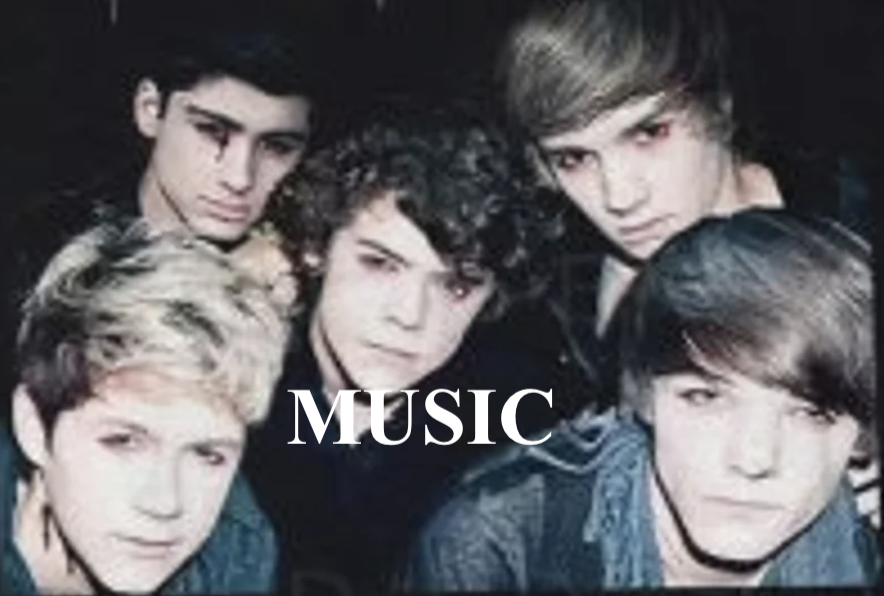

# **Part I: Set Up & Getting the Data 😤**

## Importing Basic Libraries 📚
First, we will install all the necessary libraries and software in order to properly load, clean, and visualize data!

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

## Loading Data 💬
Now, we will load our datasets from csv files and display them as dataframes!

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

In [ ]:
gdd.download_file_from_google_drive(file_id='1HkR3mqk0B6WqSvxKW8V6g3Mm-AaFQ9z7',
                                    dest_path='/content/spotify.csv')
gdd.download_file_from_google_drive(file_id='1i-mGyBA9jbrY6xX_z_ovXL6wgbxu-mZa',
                                    dest_path='/content/popularity.csv')

**`songs_df` gives us a lot of important information about the qualities of each song. Some features include:**


*   **Popularity** : this score is calculated by taking into account the number of days a song remained in the Top200 and the position it held daily (higher positions were weighted more heavily).
*   **Artist_followers** : as of Nov 5 2020, the number of followers the artist has on Spotify.
*   **Danceability** : this score is based on tempo, rhythm stability, beat strength, and overall regularity. A score of 0 is least danceable and a score of 1 is most danceable.
*   **Energy** : a perceptual measure of intensity and activity. This is contributed through dynamic range, perceived loudness, timbre, onset rate, and general entropy.
*   **Key** : the estimated overall key of the track. Integer values will map to pitches. If no key was detected, the value will be -1.
*   **Loudness** : overall loudness of a track in decibels (dB)
*   **Speechiness** : detects the presence of spoken words in a track. The more speech-like the closer to 1.0.
*   **Instrumentalness** : predicts whether a track will contain vocals.
*   **Liveness** : detects the presence of an audience in the recording (probability that the track was performed live)
*   **Valence** : describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive!



In [ ]:
songs_df = pd.read_csv('/content/spotify.csv')
songs_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,country,dance/electronic,else,funk,...,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,1.14271e+07,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170628,Taiwan,https://open.spotify.com/track/4v29A51TqtD2KFS...,31.20,smalltown,Luke Christopher,single,indie pop rap,152740,True,SmallTown,2017-07-07,1,1,0.617,0.598,6,-6.677,1,0.1,0.148,0,0.333,0.526,79.974,140825,4,pop,1226.0,1.0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,162,0.0,0.0,english speaking and nordic
170629,Taiwan,https://open.spotify.com/track/7InvbALrXpsz58J...,156.00,灰狼,G.E.M.,album,mandopop,1.22541e+06,False,摩天動物園,2019-12-26,7,13,0.679,0.602,5,-8.849,0,0.148,0.0952,0.000539,0.0921,0.316,133.951,203418,4,pop,324.0,1.0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,130,0.0,0.0,english speaking and nordic
170630,Taiwan,https://open.spotify.com/track/5rCNIuDc3VD7q6H...,90.40,預念患者,張赫宣,album,n-a,38,False,Freedom,2017-06-28,10,11,0.421,0.17,1,-13.24,1,0.0384,0.918,0,0.102,0.27,131.917,309526,4,else,1235.0,1.0,1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,133

**`spotify_df` was also included in our kaggle dataset and is essentially Spotify's rankings for every month from 2017 - 2020**

In [ ]:
spotify_df = pd.read_csv('/content/popularity.csv')
spotify_df

,Unnamed: 0,country,date,position,uri,track,title,artist
0,0,Global,05/11/2020,1.0,https://open.spotify.com/track/47EiUVwUp4C9fGc...,"Dakiti , Bad Bunny, Jhay Cortez",Dakiti,"Bad Bunny, Jhay Cortez"
1,1,Global,05/11/2020,2.0,https://open.spotify.com/track/35mvY5S1H3J2QZy...,"positions , Ariana Grande",positions,Ariana Grande
2,2,Global,05/11/2020,3.0,https://open.spotify.com/track/3tjFYV6RSFtuktY...,"Mood , 24kGoldn",Mood,24kGoldn
3,3,Global,05/11/2020,4.0,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,"Lemonade , Internet Money",Lemonade,Internet Money
4,4,Global,05/11/2020,5.0,https://open.spotify.com/track/4y4spB9m0Q6026K...,"Lonely , Justin Bieber",Lonely,Justin Bieber
...,...,...,...,...,...,...,...,...
9806996,9806996,Taiwan,01/01/2017,197.0,https://open.spotify.com/track/3zHq9ouUJQFQRf3...,"Love Me Like You Do - From ""Fifty Shades Of G...","Love Me Like You Do - From ""Fifty Shades Of G...",Ellie Goulding
9806997,9806997,Taiwan,01/01/2017,198.0,https://open.spotify.com/track/3CRDbSIZ4r5MsZ0...,"Stressed Out , Twenty One Pilots",Stressed Out,Twenty One Pilots
9806998,9806998,Taiwan,01/01/2017,199.0,https://open.spotify.com/track/2mEvsc8k8iwR099...,"The End - From ""La La Land"" Soundtrack , Just...","The End - From ""La La Land"" Soundtrack",Justin Hurwitz
9806999,9806999,Taiwan,01/01/2017,200.0,https://open.spotify.com/track/0L7loeTIg6akW84...,"Light It Up - Remix , Major Lazer",Light It Up - Remix,Major Lazer


Amazing! Now we can start the next step: **cleaning**! 😃 👍

# **Part II: Cleaning the Data** 🧼


Of course, we need to clean our data, so we can make meaningful visualizations and then later on, predictions! We will achieve this with two main steps:
*   dropping unneccessary columns and rows with NaNs in both dataframes
*   only keeping rows with global for country (since our other data later on only has global information)
*   converting datatypes to floats as needed so we can do more analysis later

That way, we can feed our data into graphs and after some more tweaking, models!

## Cleaning `songs_df` 🎶

In [ ]:
# get rid of unnecessary columns and duplicate rows
songs_df_global = songs_df.drop_duplicates(subset='Title', keep='first', inplace=False)
songs_df_filter = songs_df_global[['Country', 'Popularity', 'Title', 'Artist', 'Album/Single', 'Artist_followers', 'Explicit', 'Album', 'Release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'Genre_new', 'Days_since_release', 'Released_after_2017', 'Popu_max', 'Top10_dummy', 'Top50_dummy', 'Cluster']].copy()
songs_df_filter.dropna(inplace=True)

Filtering `songs_df`...

In [ ]:
# drop irrelevant/repeat columns and rows
songs_df_global = songs_df[songs_df['Country'] == 'Global']
songs_df_filter = songs_df_global[['Country', 'Popularity', 'Title', 'Artist', 'Album/Single', 'Artist_followers', 'Explicit', 'Album', 'Release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'Genre_new', 'Days_since_release', 'Released_after_2017', 'Popu_max', 'Top10_dummy', 'Top50_dummy', 'Cluster']].copy()
songs_df_filter.dropna(inplace=True)
songs_df_filter = songs_df_filter.drop(columns=['Country', 'Cluster', 'mode'])
songs_df_filter.sample(n=10)

,Popularity,Title,Artist,Album/Single,Artist_followers,Explicit,Album,Release_date,danceability,energy,key,loudness,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Popu_max,Top10_dummy,Top50_dummy
36083,3045.50,go,The Kid LAROI - Juice WRLD,album,684220,True,F*CK LOVE,2020-07-24,0.487,0.74,6,-4.973,0.0944,0.157,0,0.612,0.522,73.779,181688,4,hip hop,113.0,1.0,76,0.0,0.0
299,1745.10,juju on that beat,Zay Hilfigerrr - Zayion McCall,single,62634,False,Juju on That Beat (TZ Anthem),2016-09-30,0.807,0.887,1,-3.892,0.275,0.00381,0,0.391,0.78,160.517,144244,4,else,1497.0,0.0,74,0.0,0.0
14360,4059.40,new freezer,Rich The Kid - Kendrick Lamar,single,2.36714e+06,True,New Freezer (feat. Kendrick Lamar),2017-09-25,0.888,0.664,0,-10.13,0.341,0.0424,0,0.0734,0.53,140.012,193173,4,hip hop,1146.0,1.0,81,0.0,0.0
78811,78.40,how to disappear,Lana Del Rey,album,11440791,False,Norman Fucking Rockwell!,2019-08-30,0.326,0.303,9,-11.802,0.047,0.565,0.000655,0.161,0.0677,78.888,228071,3,pop,442.0,1.0,122,0.0,0.0
44948,5694.35,suicidal,YNW Melly - Juice WRLD,single,4.89777e+06,True,Suicidal (Remix) [feat. Juice WRLD],2020-03-13,0.655,0.441,9,-5.245,0.0629,0.474,0,0.099,0.273,139.957,225857,4,rap,246.0,1.0,67,0.0,0.0
81913,23712.60,freaky friday,Lil Dicky - Chris Brown,single,1725769,True,Freaky Friday (feat. Chris Brown),2018-03-15,0.755,0.599,8,-5.042,0.224,0.147,0,0.109,0.755,133.123,216632,4,rap,975.0,1.0,7,1.0,1.0
5469,12.80,was erlebt,Gzuz - Bonez MC,single,1.04433e+06,True,Was erlebt,2018-04-27,0.484,0.782,8,-5.674,0.298,0.0915,0.00236,0.116,0.307,95.401,218499,4,hip hop,932.0,1.0,185,0.0,0.0
49736,8446.70,salt,Ava Max,single,2.45725e+06,False,Salt,2019-12-12,0.693,0.835,6,-3.242,0.0623,0.131,0,0.073,0.743,128.057,180283,4,pop,338.0,1.0,63,0.0,0.0
46731,100.00,cocky,A$AP Rocky - Gucci Mane - 21 Savage - London O...,single,8.12258e+06,True,Cocky (feat. London On Da Track),2018-02-16,0.797,0.633,5,-4.815,0.238,0.223,0,0.109,0.577,156.015,232413,4,hip hop,1002.0,1.0,131,0.0,0.0
22775,672.10,"baby, its cold outside",Dean Martin,album,981590,False,A Winter Romance,1959-01-01,0.469,0.196,0,-16.093,0.0571,0.882,0,0.0513,0.537,130.036,143733,3,pop,22589.0,0.0,57,0.0,0.0


Converting our string values into floats!

In [ ]:
# convert strings to floats
songs_df_types = songs_df_filter.copy()
songs_df_types['danceability'] = pd.to_numeric(songs_df_types['danceability'], errors='coerce')
songs_df_types['energy'] = pd.to_numeric(songs_df_types['energy'], errors='coerce')
songs_df_types['key'] = pd.to_numeric(songs_df_types['key'], errors='coerce')
songs_df_types['loudness'] = pd.to_numeric(songs_df_types['loudness'], errors='coerce')
songs_df_types['speechiness'] = pd.to_numeric(songs_df_types['speechiness'], errors='coerce')
songs_df_types['acoustics'] = pd.to_numeric(songs_df_types['acoustics'], errors='coerce')
songs_df_types['instrumentalness'] = pd.to_numeric(songs_df_types['instrumentalness'], errors='coerce')
songs_df_types['liveliness'] = pd.to_numeric(songs_df_types['liveliness'], errors='coerce')
songs_df_types['valence'] = pd.to_numeric(songs_df_types['valence'], errors='coerce')
songs_df_types['tempo'] = pd.to_numeric(songs_df_types['tempo'], errors='coerce')
songs_df_types['duration_ms'] = pd.to_numeric(songs_df_types['duration_ms'], errors='coerce')
songs_df_types['time_signature'] = pd.to_numeric(songs_df_types['time_signature'], errors='coerce')

In [ ]:
# convert artist following to floats
songs_df_types['Artist_followers'] = songs_df_filter['Artist_followers'].apply(lambda x: float(x))
# convert explict to 0/1 (0 = not explicit, 1 = explicit)
songs_df_types = songs_df_types.replace({'Explicit': {'True': True, 'False': False}})
songs_df_types["Explicit"] = songs_df_types["Explicit"].astype(int)
# convert release date to datetime
songs_df_types['Release_date']= pd.to_datetime(songs_df_types['Release_date'])

In [ ]:
# check final datatypes
songs_df_types.dtypes

Popularity                    float64
Title                          object
Artist                         object
Album/Single                   object
Artist_followers              float64
Explicit                        int64
Album                          object
Release_date           datetime64[ns]
danceability                  float64
energy                        float64
key                             int64
loudness                      float64
speechiness                   float64
acoustics                     float64
instrumentalness              float64
liveliness                    float64
valence                       float64
tempo                         float64
duration_ms                     int64
time_signature                  int64
Genre_new                      object
Days_since_release            float64
Released_after_2017           float64
Popu_max                        int64
Top10_dummy                   float64
Top50_dummy                   float64
dtype: objec

In [ ]:
songs_df_artist_array = songs_df_types.copy()
# strip spaces
songs_df_artist_array['Title'] = songs_df_artist_array['Title'].str.strip()
songs_df_artist_array['Artist'] = songs_df_artist_array['Artist'].str.strip()
songs_df_artist_array['Album'] = songs_df_artist_array['Album'].str.strip()
songs_df_artist_array['Genre_new'] = songs_df_artist_array['Genre_new'].str.strip()
# format artists for easier checking later
songs_df_artist_array['Artist'] = songs_df_artist_array['Artist'].str.replace(' - ', ', ')

And now...the clean dataframe!

In [ ]:
# clean dataframe!
songs_df_clean = songs_df_artist_array.copy()
songs_df_clean.sample(n=10)

,Popularity,Title,Artist,Album/Single,Artist_followers,Explicit,Album,Release_date,danceability,energy,key,loudness,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Popu_max,Top10_dummy,Top50_dummy
36757,34212.55,ispy,"KYLE, Lil Yachty",single,931301.0,1,iSpy (feat. Lil Yachty),2016-12-02,0.746,0.653,7,-6.745,0.2890,0.37800,0.000000,0.2290,0.672,75.016,253107,4,pop,1434.0,0.0,18,0.0,1.0
13477,2319.45,find u again,"Mark Ronson, Camila Cabello",single,854572.0,0,Find U Again (feat. Camila Cabello),2019-05-30,0.605,0.664,8,-7.162,0.0316,0.00548,0.000003,0.2040,0.164,103.997,176417,4,pop,534.0,1.0,25,0.0,1.0
20978,14250.30,what a man gotta do,Jonas Brothers,single,4654109.0,0,What A Man Gotta Do,2020-01-17,0.852,0.698,9,-7.206,0.0629,0.00839,0.000001,0.0773,0.324,113.039,180645,4,boy band,302.0,1.0,24,0.0,1.0
6471,28.80,comprei um lança,Mc Jacare,single,21777.0,1,Comprei um Lança,2020-04-07,0.652,0.723,7,-7.576,0.1120,0.23800,0.000349,0.0719,0.530,130.759,112346,3,funk,221.0,1.0,188,0.0,0.0
62930,172.00,tap in,"Saweetie, Post Malone, DaBaby, Jack Harlow",single,793305.0,1,"Tap In (feat. Post Malone, DaBaby & Jack Harlow)",2020-08-28,0.948,0.630,1,-7.011,0.2190,0.00647,0.000020,0.0737,0.425,100.032,253569,4,rap,78.0,1.0,73,0.0,0.0
55323,6855.85,"alone, pt. ii","Alan Walker, Ava Max",single,24925809.0,0,"Alone, Pt. II",2019-12-27,0.670,0.668,3,-4.306,0.0422,0.53600,0.000000,0.1330,0.608,88.033,179053,4,house,323.0,1.0,77,0.0,0.0
77387,221.75,outstanding,Gunna,album,2611308.0,1,Drip or Drown 2,2019-02-22,0.829,0.730,6,-4.554,0.2410,0.30900,0.000000,0.1090,0.324,149.075,180780,4,hip hop,631.0,1.0,86,0.0,0.0
1583,28.80,sex mit dir,Apache 207,album,1255334.0,1,Platte,2019-10-25,0.845,0.559,1,-7.182,0.0605,0.37500,0.037200,0.0965,0.430,119.951,173200,4,hip hop,386.0,1.0,165,0.0,0.0
54822,23111.70,here with me,"Marshmello, CHVRCHES",single,27670203.0,0,Here With Me,2019-03-08,0.791,0.565,5,-3.933,0.0439,0.06230,0.000000,0.1560,0.181,99.961,156347,4,dance/electronic,617.0,1.0,11,0.0,1.0
73236,176.80,all i need,"Joakim Lundell, Arrhult",single,127807.0,0,All I Need,2017-02-14,0.698,0.833,1,-4.868,0.3470,0.49100,0.000000,0.1060,0.473,94.990,184000,4,pop,1365.0,1.0,131,0.0,0.0


## Cleaning `spotify_df` 🎩
We repeat the processes for our other dataset, `spotify_df` below:

In [ ]:
# drop irrelevant/repeat columns
spotify_df_global = spotify_df[spotify_df['country'] == 'Global']
spotify_df_filter = spotify_df_global[['country', 'date', 'position', 'title', 'artist']].copy()
spotify_df_filter = spotify_df_filter.drop(columns=['country'])
spotify_df_filter.dropna(inplace=True)
# strip spaces
spotify_df_filter['title'] = spotify_df_filter['title'].str.strip()
spotify_df_filter['artist'] = spotify_df_filter['artist'].str.strip()
# format artists for easier checking later
spotify_df_filter['artist'] = spotify_df_filter['artist'].str.replace(', ', ', ')
spotify_df_filter.sample(n=10)

,date,position,title,artist
206456,08/01/2018,57.0,Attention,Charlie Puth
127530,07/02/2019,131.0,changes,XXXTENTACION
58151,20/01/2020,152.0,SAD!,XXXTENTACION
66083,11/12/2019,84.0,Ransom - Remix,Lil Tecca
255345,06/05/2017,146.0,Stressed Out,Twenty One Pilots
171989,30/06/2018,190.0,I Wanna Know,NOTD
157784,09/09/2018,185.0,What Lovers Do,Maroon 5
212977,07/12/2017,178.0,Look At Me!,XXXTENTACION
157360,11/09/2018,161.0,sweetener,Ariana Grande
279599,04/01/2017,200.0,Take Me To Church,Hozier


In [ ]:
# convert release date to datetime
spotify_df_filter['date'] = pd.to_datetime(spotify_df_filter['date'])
# convert position to int
spotify_df_filter['position'] = spotify_df_filter['position'].astype(int)
spotify_df_filter.dtypes

date        datetime64[ns]
position             int64
title               object
artist              object
dtype: object

In [ ]:
# clean dataframe!
spotify_df_clean = spotify_df_filter.copy()
spotify_df_clean.sample(n=10)

,date,position,title,artist
151964,2018-08-10,165,OTW,"Khalid, 6LACK, Ty Dolla $ign"
213684,2017-03-12,85,Wait,Maroon 5
244401,2017-02-07,2,Wild Thoughts,DJ Khaled
9153,2020-09-21,154,Rojo,J Balvin
205805,2018-11-01,6,New Rules,Dua Lipa
97729,2019-06-07,130,Sunset,Dreamville
184639,2018-04-27,40,Without You,Avicii
168964,2018-07-15,165,Wolves,"Selena Gomez, Marshmello"
49651,2020-02-03,52,25/8,Bad Bunny
251709,2017-05-24,110,Drowning,A Boogie Wit da Hoodie


With our formatted Spotify chart data, we want to calculate three additional measures for each unique song title (and add these as new columns):

*   Number of appearances on Spotify top 200 charts
*   Highest position
*   Lowest position


In [ ]:
# number of appearances on top 200 charts
title_count = spotify_df_clean.groupby(['title', 'artist'])['date'].count().reset_index()
title_count = title_count.rename(columns = {'date': 'Title_count'})

# highest position on charts
highest = spotify_df_clean.groupby(['title', 'artist'])['position'].min().reset_index()
highest = highest.rename(columns = {'position': 'Highest'})

# lowest position on charts
lowest = spotify_df_clean.groupby(['title', 'artist'])['position'].max().reset_index()
lowest = lowest.rename(columns = {'position': 'Lowest'})

# merging into a final dataframe
spotify_final_df = pd.merge(pd.merge(title_count, highest, on=['title', 'artist']), lowest, on=['title', 'artist'])
spotify_final_df = spotify_final_df.rename(columns = {'title': 'Title', 'artist': 'Artist', 'Title_count': 'Spotify_title_count', 'Highest': 'Spotify_highest', 'Lowest': 'Spotify_lowest'})
spotify_final_df.loc[spotify_final_df['Spotify_title_count'] > 0, 'Spotify_appears'] = 1
spotify_final_df.sample(n=10)

,Title,Artist,Spotify_title_count,Spotify_highest,Spotify_lowest,Spotify_appears
109,A Different Way,DJ Snake,118,56,198,1.0
1990,If I'm Lucky,Jason Derulo,85,69,197,1.0
2713,Mos Definitely,Logic,1,123,123,1.0
1913,I Love You 3000,Stephanie Poetri,1,183,183,1.0
856,Con Calma - Remix,"Daddy Yankee, Katy Perry, Snow",22,134,200,1.0
3720,Sigo Extrañándote,J Balvin,237,66,198,1.0
3814,Soltera,"Lunay, Chris Jeday, Ga, Music",66,97,182,1.0
2618,Mele Kalikimaka - Single Version,"Bing Cros,, The Andrews Sisters",2,101,183,1.0
3436,Ring Ring,Juice WRLD,3,121,193,1.0
4727,You Be Love,Avicii,9,51,192,1.0


# **Part III: Getting More Data** 🧐
Hm... but can we trust Spotify's rankings as the end all be all of a song's popularity? 🤔

**We don't think so 🙄🤚**

We do have an Apple Music user in this group (I know, embarassing but it's not my fault I'm on a family plan and I'm poor 😔), so we are quite aware that there are other charts out there that use different metrics to rank songs. So, we will be acquiring some second (and third!) opinions on popularity by getting global charts from both iTunes and Billboard. 

When acquiring the global charts from iTunes and Billboard
we ran into some issues :

*   Uniformity : Billboard only gave weekly charts and the website we used for iTunes charts only gave daily charts. We wanted to be able to match our new data with our existing data in the best way possible so we could preserve more data when we joined our tables. Since our original dataset got positions by selecting a specific date each month, we decided that condensing everything to a "monthly" ranking would be the best fit! We later encountered some issues with our given Spotify data, but we'll get more into that later :'(
*   Getting foreign songs/artists to display correctly: luckily, this problem was more easily solvable and we simply needed to import an extra library!


## More Libraries 📚
We will be using **BeautifulSoup** to scrape our data and we will mount to google drive to export our csv's for faster runtimes 🏃‍♂️💨

In [ ]:
!pip install requests
!pip3 install beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import datetime

# make sure asian characters are displayed correctly
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


## iTunes Charts 🎧
We were able to find a [website](https://kworb.net/ww/archive/) that documented iTunes charts pretty throughly! It contains global top 200 data from every day all the way from 2011 - present! Gee whiz!

Our main data set contained data from 2017 - 2020, but we assumed that top songs during this period might also have charted before and after this period, so we extended our scrape to 2014 - 2021 and we did the same with the Billboard charts later. To match our original Spotify chart dataset (`songs_df_clean`) we extracted the top 200 songs from the same day each month for every year.



This is our code for scraping the iTunes charts! It took a long time to run, so we exported our final scraped dataframe to a csv so future runs would go a lot faster 😪

Feel free to still run the cell if you would like (since this code took quite a bit of effort) ! It just takes ~5 min 😬

In [ ]:
# # scrape itunes charts top 200 from every month from 2014-2021
# years = np.arange(2014, 2022, 1)
# months = np.arange(1, 13, 1)
# # dataframe to store rankings
# itunes_scrape_df = pd.DataFrame(columns=['Date', 'Position', 'Artist_Title'])

# for year in years:
#   for month in months:
#     if (month < 10):
#       # reformat months to always be 2 numbers
#       month_string = '0' + str(month)
#     else:
#       month_string = str(month)

#     # build the url for each page we want to scrape from
#     url = "https://kworb.net/ww/archive/" + str(year) + month_string + '11' + '.html'
#     html = urllib2.urlopen(url)
#     webpage = html.read().decode('utf-8', 'ignore')
#     soup = BeautifulSoup(webpage, 'html.parser')
#     table = soup.find('table', attrs={'class': 'sortable'})

#     # scrape!
#     for row in table.tbody.find_all('tr'):    
#       columns = row.find_all('td')
#       if (columns != []):
#         date = datetime.datetime(year=year, month=month, day=11)
#         position = columns[0].text.strip()
#         artist_title = columns[2].text.strip()
#         itunes_scrape_df = itunes_scrape_df.append({'Date': date, 'Position': position,  'Artist_Title': artist_title}, ignore_index=True)

# # save scraped data to csv
# itunes_scrape_df.to_csv('/drive/My Drive/itunes_scrape.csv', encoding='utf_8_sig')
# itunes_scrape_df

In [ ]:
# retrieve scraped csv
gdd.download_file_from_google_drive(file_id='1-53mKJLXGqtFIAa2t-V71nfnu-gSVVpU',
                                    dest_path='/content/itunes_scrape.csv')
itunes_scrape_retrieve = pd.read_csv('/content/itunes_scrape.csv', encoding='utf-8')
itunes_scrape_retrieve

,Unnamed: 0,Date,Position,Artist_Title
0,0,2014-01-11,1,Pitbull - Timber
1,1,2014-01-11,2,Eminem - The Monster
2,2,2014-01-11,3,Pharrell Williams - Happy
3,3,2014-01-11,4,Avicii - Wake Me Up
4,4,2014-01-11,5,Avicii - Hey Brother
...,...,...,...,...
21595,21595,2021-12-11,196,YOASOBI - Gunjou
21596,21596,2021-12-11,197,Chris Stapleton - You Should Probably Leave
21597,21597,2021-12-11,198,Vance Joy - Missing Piece
21598,21598,2021-12-11,199,JUJU - KotaeAwase


Cool beans! Now that we have a bunch of data from iTunes charts, we can format it better by separating artist and song title and making position an int!

In [ ]:
# itunes_sep_df = itunes_scrape_df.copy()
itunes_sep_df = itunes_scrape_retrieve.copy()
itunes_sep_df['Position'] = pd.to_numeric(itunes_sep_df['Position'])
itunes_sep_df[['Artist', 'Title']] = itunes_sep_df['Artist_Title'].str.rsplit(' - ', 1, expand=True)
# strip spaces
itunes_sep_df['Title'] = itunes_sep_df['Title'].str.strip()
itunes_sep_df['Artist'] = itunes_sep_df['Artist'].str.strip()
# turn artists lists into an array for easier checking later
itunes_sep_df['Artist'] = itunes_sep_df['Artist'].str.replace(' & ', ', ')
itunes_sep_df.sample(n=10)

,Unnamed: 0,Date,Position,Artist_Title,Artist,Title
8632,8632,2016-11-11,133,Duke Dumont - Ocean Drive,Duke Dumont,Ocean Drive
9705,9705,2017-03-11,206,GFriend - Fingertip,GFriend,Fingertip
8226,8226,2016-09-11,227,Jason Derülo - Kiss the Sky,Jason Derülo,Kiss the Sky
19113,19113,2020-12-11,114,Chris Stapleton - Starting Over,Chris Stapleton,Starting Over
15833,15833,2019-08-11,34,Ed Sheeran - Perfect,Ed Sheeran,Perfect
3439,3439,2015-02-11,190,Mr. Probz - Nothing Really Matters,Mr. Probz,Nothing Really Matters
8808,8808,2016-12-11,59,Ellie Goulding - Still Falling for You,Ellie Goulding,Still Falling for You
13823,13823,2018-10-11,24,Rita Ora - Let You Love Me,Rita Ora,Let You Love Me
14076,14076,2018-11-11,77,Queen - Crazy Little Thing Called Love,Queen,Crazy Little Thing Called Love
14447,14447,2019-01-11,48,Skylar Grey - Everything I Need,Skylar Grey,Everything I Need


In [ ]:
# reorder columns
itunes_df = itunes_sep_df[['Date', 'Position', 'Title', 'Artist']].copy()
itunes_df.sample(n=10)

,Date,Position,Title,Artist
16544,2019-11-11,145,Pump It Up,Endor
19667,2021-03-11,68,Hello,Adele
5423,2015-10-11,174,S.O.B.,"Nathaniel Rateliff, The Night Sweats"
16811,2020-01-11,12,Circles,Post Malone
12313,2018-02-11,114,More Than Friends,James Hype
16635,2019-12-11,36,Beautiful People,Ed Sheeran
5313,2015-10-11,64,"I Don't Like It, I Love It",Flo Rida
1974,2014-08-11,225,Do It Again,"Robyn, Röyksopp"
6108,2016-01-11,109,Firestone,Kygo
5167,2015-09-11,168,King,"Years, Years"


With our formatted iTunes data, we want to calculate three additional measures for each unique song title (and add these as new columns):


*   Number of appearances on iTunes top 200 charts
*   Highest position
*   Lowest position


In [ ]:
# number of appearances of top 200 charts
title_count = itunes_df.groupby(['Title', 'Artist'])['Date'].count().reset_index()
title_count = title_count.rename(columns = {'Date': 'Title_count'})

# highest chart position
highest = itunes_df.groupby(['Title', 'Artist'])['Position'].min().reset_index()
highest = highest.rename(columns = {'Position': 'Highest'})

# lowest chart position
lowest = itunes_df.groupby(['Title', 'Artist'])['Position'].max().reset_index()
lowest = lowest.rename(columns = {'Position': 'Lowest'})

# merging into final iTunes dataframe
itunes_final_df = pd.merge(pd.merge(title_count, highest, on=['Title', 'Artist']), lowest, on=['Title', 'Artist'])
itunes_final_df = itunes_final_df.rename(columns = {'Title_count': 'iTunes_title_count', 'Highest': 'iTunes_highest', 'Lowest': 'iTunes_lowest'})
itunes_final_df.loc[itunes_final_df['iTunes_title_count'] > 0, 'iTunes_appears'] = 1
itunes_final_df.sample(n=10)

,Title,Artist,iTunes_title_count,iTunes_highest,iTunes_lowest,iTunes_appears
3742,Morgenröte,"Sunny, Felix van Frieden",1,123,123,1.0
5766,Unbreakable,Conchita Wurst,1,240,240,1.0
183,Ain't Enough Whiskey,Kid Rock,1,140,140,1.0
102,95 BPM,Samra,1,188,188,1.0
1879,"Forever and Ever, Amen",Randy Travis,2,149,156,1.0
4958,Small Talk,Katy Perry,1,7,7,1.0
5679,True Colors,"Anna Kendrick, Justin Timberlake",3,132,179,1.0
785,Break My Heart,Dua Lipa,8,10,80,1.0
4756,Sax,Fleur East,7,58,241,1.0
1994,Gimme Gimme Gimme,Cher,1,10,10,1.0


## Billboard Charts 🎸
The [Billboard charts](https://www.billboard.com/charts/billboard-global-200/) were a little trickier to work with, since they had a more complex format—we could only select a date and get weekly charts from that day. Once we were able to sift through the html more, their chart system did not prove to be much of an obstacle. We simply extracted the chart data from the same day each month so we still ended up with monthly data from 2014-2021!

This is our code for scraping the Billboard charts! Like with iTunes, it took a long time to run, so we exported our final scraped dataframe to a csv so future runs would go a lot faster 😪

Feel free to still run the cell if you would like! It just takes ~5 min 😬

In [ ]:
# #scrape billboard charts top 200 from every month between 2014 and 2021
# years = np.arange(2014, 2022, 1)
# months = np.arange(1, 13, 1)
# # dataframe to store rankings
# billboard_scrape_df = pd.DataFrame(columns=['Date', 'Position', 'Title', 'Artist'])

# for year in years:
#   for month in months:
#     if (month < 10):
#       # reformat months to always be 2 numbers
#       month_string = '0' + str(month)
#     else:
#       month_string = str(month)

#     # build url for each page to scrape
#     url = "https://www.billboard.com/charts/billboard-global-200/" + str(year) + '-' + month_string + '-11/'
#     webpage = requests.get(url).text
#     soup = BeautifulSoup(webpage, 'html.parser')
    
#     # scrape!
#     for row in soup.find_all("ul", attrs={"class": "o-chart-results-list-row"}):
#       date = datetime.datetime(year=year, month=month, day=11)
#       position=row['data-detail-target']
#       title =row.find('h3', {'class' : 'c-title'}).text.strip()
#       artist=row.find('li', {'class' : 'lrv-u-flex-grow-1'}).find('span', {'class':'c-label'}).text.strip()
#       billboard_scrape_df = billboard_scrape_df.append({'Date': date, 'Position': position, 'Artist': artist, 'Title': title}, ignore_index=True)

# # save scraped data to csv
# billboard_scrape_df.to_csv('/drive/My Drive/billboard_scrape.csv')
# billboard_scrape_df

In [ ]:
# retrieve scraped csv
gdd.download_file_from_google_drive(file_id='1-ecAC_NGf2DOZHP7S6MwzKskWvVWRyyS',
                                    dest_path='/content/billboard_scrape.csv')
billboard_scrape_retrieve = pd.read_csv('/content/billboard_scrape.csv')
billboard_scrape_retrieve

,Unnamed: 0,Date,Position,Title,Artist
0,0,2014-01-11,1,WAP,Cardi B Featuring Megan Thee Stallion
1,1,2014-01-11,2,Dynamite,BTS
2,2,2014-01-11,3,Mood,24kGoldn Featuring iann dior
3,3,2014-01-11,4,Hawai,Maluma
4,4,2014-01-11,5,Laugh Now Cry Later,Drake Featuring Lil Durk
...,...,...,...,...,...
19195,19195,2021-12-11,196,What Christmas Means To Me,John Legend Featuring Stevie Wonder
19196,19196,2021-12-11,197,Yellow,Coldplay
19197,19197,2021-12-11,198,Always Been You,Jessie Murph
19198,19198,2021-12-11,199,Rapstar,Polo G


Cleaning up our Billboard data...

In [ ]:
billboard_cleaning_df = billboard_scrape_retrieve.copy()
# position as ints
billboard_cleaning_df['Position'] = pd.to_numeric(billboard_cleaning_df['Position'])
# strip spaces
billboard_cleaning_df['Title'] = billboard_cleaning_df['Title'].str.strip()
billboard_cleaning_df['Artist'] = billboard_cleaning_df['Artist'].str.strip()
# turn artists lists into an array for easier checking later
billboard_cleaning_df['Artist'] = billboard_cleaning_df['Artist'].str.replace(' Featuring ', ', ')
billboard_cleaning_df.sample(n=10)

,Unnamed: 0,Date,Position,Title,Artist
7312,7312,2017-01-11,113,No Guidance,"Chris Brown, Drake"
7791,7791,2017-03-11,192,Make You Happy,NiziU
10720,10720,2018-06-11,121,Ayer Me Llamo Mi Ex,"KHEA x Natti Natashi x Prince Royce, Lenny Santos"
17523,17523,2021-04-11,124,Starting Over,Chris Stapleton
10757,10757,2018-06-11,158,Say You Won't Let Go,James Arthur
18092,18092,2021-07-11,93,Enough For You,Olivia Rodrigo
16499,16499,2020-11-11,100,Dior,Pop Smoke
2791,2791,2015-02-11,192,Make You Happy,NiziU
419,419,2014-03-11,20,Heather,Conan Gray
7537,7537,2017-02-11,138,Girls Like You,"Maroon 5, Cardi B"


With our formatted Billboard data, we want to calculate three additional measures for each unique song title (and add these as new columns):

*   Number of appearances on BillBoard top 200 charts
*   Highest position
*   Lowest position


In [ ]:
# number of appearances in top 200 charts
title_count = billboard_cleaning_df.groupby(['Title', 'Artist'])['Date'].count().reset_index()
title_count = title_count.rename(columns = {'Date': 'Title_count'})

# highest chart position
highest = billboard_cleaning_df.groupby(['Title', 'Artist'])['Position'].min().reset_index()
highest = highest.rename(columns = {'Position': 'Highest'})

# lowest chart position
lowest = billboard_cleaning_df.groupby(['Title', 'Artist'])['Position'].max().reset_index()
lowest = lowest.rename(columns = {'Position': 'Lowest'})

# merging into final Billboard dataset
billboard_final_df = pd.merge(pd.merge(title_count, highest, on=['Title', 'Artist']), lowest, on=['Title', 'Artist'])
billboard_final_df = billboard_final_df.rename(columns = {'Title_count': 'Billboard_title_count', 'Highest': 'Billboard_highest', 'Lowest': 'Billboard_lowest'})
billboard_final_df.loc[billboard_final_df['Billboard_title_count'] > 0, 'Billboard_appears'] = 1
billboard_final_df.sample(n=10)

,Title,Artist,Billboard_title_count,Billboard_highest,Billboard_lowest,Billboard_appears
172,Cupid's Chokehold/Breakfast In America,"Gym Class Heroes, Patrick Stump",1,129,129,1.0
577,One More Time,Daft Punk,1,193,193,1.0
123,Breaking Me,Topic & A7S,90,21,155,1.0
374,I Wanna Be Your Slave,Maneskin,7,13,145,1.0
92,Bet You Wanna,"BLACKPINK, Cardi B",1,25,25,1.0
801,The Woo,"Pop Smoke, 50 Cent & Roddy Ricch",84,40,173,1.0
455,Like That,"Doja Cat, Gucci Mane",81,187,187,1.0
888,Wonder,Shawn Mendes,5,13,140,1.0
679,Savage Love (Laxed - Siren Beat),Jawsh 685 x Jason Derulo,94,1,192,1.0
851,Wasted Love,"Ofenbach, Lagique",1,169,169,1.0


# **Part IV: Combining Data** 🤝
So now, our main dataframes that we're working with are:


*   `songs_df_clean`
*   `spotify_final_df`
*   `itunes_final_df`
*   `billboard_final_df`

We want to use the last three dataframes that deal with global charts to classify the levels of global popularity for songs.

We will classify song popularity as follows:

*   If a song is ranked below the top 100, it is **unpopular**
*   If a song is ranked between the top 50 - 100, it is **semi-popular**
*   If a song is ranked in the top 50, it is **popular**

To make our lives easier, we are going to be combining these three dataframes!
These dataframes all deal with a song's charting, so we can easily join them based on the song's title and artist. That way, each song will have three separate ranking metrics: Spotify, iTunes, and BillBoard.

We can then add these rankings to the our dataframe that contains all of the song qualities. This will be used later on to predict overall popularity!





In [ ]:
itunes_merge = itunes_final_df.copy()
spotify_merge = spotify_final_df.copy()
billboard_merge = billboard_final_df.copy()

itunes_merge['Title'] = itunes_merge['Title'].str.strip()
spotify_merge['Title'] = spotify_merge['Title'].str.strip()
billboard_merge['Title'] = billboard_merge['Title'].str.strip()

spotify_itunes_combined = spotify_merge.merge(itunes_merge, how='outer', left_on=['Title', 'Artist'], right_on=['Title', 'Artist'])
all_charts_combined = spotify_itunes_combined.merge(billboard_merge, how='outer', left_on=['Title', 'Artist'], right_on=['Title', 'Artist'])
all_charts_combined.sample(10)

,Title,Artist,Spotify_title_count,Spotify_highest,Spotify_lowest,Spotify_appears,iTunes_title_count,iTunes_highest,iTunes_lowest,iTunes_appears,Billboard_title_count,Billboard_highest,Billboard_lowest,Billboard_appears
6963,Holding Onto Heaven,Foxes,NaN,NaN,NaN,NaN,1.0,217.0,217.0,1.0,NaN,NaN,NaN,NaN
10135,Woke Up Late,Drax Project,NaN,NaN,NaN,NaN,2.0,177.0,187.0,1.0,NaN,NaN,NaN,NaN
6141,Don't Cry For Me,"Alok, Martin Jensen, Jason Derulo",NaN,NaN,NaN,NaN,1.0,53.0,53.0,1.0,NaN,NaN,NaN,NaN
2104,Jaded,Drake,18.0,23.0,196.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6747,Gyal You a Party Animal,Charly Black,NaN,NaN,NaN,NaN,2.0,224.0,237.0,1.0,NaN,NaN,NaN,NaN
1762,Hey Mamma - Radio Edit,Sunstroke Project,3.0,133.0,176.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11335,Rudolph The Red-Nosed Reindeer,Gene Autry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,100.0,125.0,1.0
6059,Deserve,Kris Wu,NaN,NaN,NaN,NaN,1.0,24.0,24.0,1.0,NaN,NaN,NaN,NaN
9453,Thank You For Everything,Sunrise Avenue,NaN,NaN,NaN,NaN,1.0,84.0,84.0,1.0,NaN,NaN,NaN,NaN
7316,Is It Love,Rea Garvey,NaN,NaN,NaN,NaN,6.0,68.0,183.0,1.0,NaN,NaN,NaN,NaN


Now that we have our combined chart data, we can calculate these new ranking classifications!

First, we have to replace the NaNs with 0s. We can also drop the lowest chart placements and the title counts because they won't really affect our global popularity calculations.

In [ ]:
all_charts_combined_final = all_charts_combined.copy()

# replacing NaNs with 0
all_charts_combined_final = all_charts_combined_final.fillna(0)

# dropping lowest columns
all_charts_combined_final = all_charts_combined_final.drop(['Spotify_lowest', 'iTunes_lowest', 'Billboard_lowest'], axis=1)

# dropping title_count columns
all_charts_combined_final = all_charts_combined_final.drop(['Spotify_title_count', 'iTunes_title_count', 'Billboard_title_count'], axis=1)
all_charts_combined_final.sample(10)

,Title,Artist,Spotify_highest,Spotify_appears,iTunes_highest,iTunes_appears,Billboard_highest,Billboard_appears
6849,Heartbreak in This City,"Steps, Michelle Visage",0.0,0.0,125.0,1.0,0.0,0.0
7694,Lights,BTS,0.0,0.0,54.0,1.0,0.0,0.0
11099,Hold On,Adele,0.0,0.0,0.0,0.0,123.0,1.0
5266,Atashiga Tonarini Iru Uchini,Chiai Fujikawa,0.0,0.0,194.0,1.0,0.0,0.0
6339,Every Other Freckle,alt-J,0.0,0.0,208.0,1.0,0.0,0.0
739,Cataleya,Samra,196.0,1.0,110.0,1.0,0.0,0.0
6025,Daystar,KYUHYUN,0.0,0.0,167.0,1.0,0.0,0.0
6010,Darling,西野 カナ,0.0,0.0,199.0,1.0,0.0,0.0
5216,Angst,Loredana,0.0,0.0,88.0,1.0,0.0,0.0
2906,No Way!,Bazzi,80.0,1.0,0.0,0.0,0.0,0.0


Each song that appears in a chart has a value of 1 in each chart's "appears" column. From this, to find the popularity classifications, we will sum the values of each song's `Spotify_appears`, `iTunes_appears`, and `Billboard_appears` values.

* Note that the number of times the songs appeared on a chart did not end up playing into our popularity classifcations. This was because we realized that some of our data was quite skewed, especially the Spotify data that was given to us from the Kaggle dataset. Even though it did state that it took a daily top 200 from the same day every month (which is what we did for iTunes and Billboard), title counts were drastically higher and we decided it would skew too much :'(
* Instead, we opted to average peak chart positions which we felt was a more accurate metric and taking the average reduced skewing!

In [ ]:
# make a list of the chart appearance columns
column_list = list(all_charts_combined_final)
column_list.remove('Title')
column_list.remove('Spotify_highest')
column_list.remove('iTunes_highest')
column_list.remove('Billboard_highest')

# create a column that will hold the appearance sums
all_charts_combined_final["appearance_sum"] = all_charts_combined_final[column_list].sum(axis=1)
all_charts_combined_final.sample(10)

,Title,Artist,Spotify_highest,Spotify_appears,iTunes_highest,iTunes_appears,Billboard_highest,Billboard_appears,appearance_sum
857,Conan x Xenia,"Haftbefehl, SHIRIN DAVID",98.0,1.0,0.0,0.0,0.0,0.0,1.0
4090,Tell Me U Luv Me,Juice WRLD,15.0,1.0,0.0,0.0,0.0,0.0,1.0
2729,Moving Along,5 Seconds of Summer,190.0,1.0,0.0,0.0,0.0,0.0,1.0
9144,Someone,Kelly Clarkson,0.0,0.0,243.0,1.0,0.0,0.0,1.0
782,Chill Bill,Rob $tone,71.0,1.0,0.0,0.0,0.0,0.0,1.0
10613,冬の花,宮本浩次,0.0,0.0,149.0,1.0,0.0,0.0,1.0
1400,Find U Again,Mark Ronson,25.0,1.0,163.0,1.0,0.0,0.0,2.0
3882,Starships,Nicki Minaj,155.0,1.0,213.0,1.0,0.0,0.0,2.0
23,110,"Capital Bra, Samra, LEA",34.0,1.0,0.0,0.0,0.0,0.0,1.0
3492,Ruin The Friendship,Demi Lovato,120.0,1.0,0.0,0.0,0.0,0.0,1.0


Now, we are able to average each song's peak rankings across the chart platforms!



In [ ]:
# make a list of the highest rankings across the charts
rank_list = list(all_charts_combined_final)
rank_list.remove('Title')
rank_list.remove('Spotify_appears')
rank_list.remove('iTunes_appears')
rank_list.remove('Billboard_appears')
rank_list.remove('appearance_sum')

# create a column that will hold the average rankings across all three chartings
all_charts_combined_final['rank_avg'] = all_charts_combined_final[rank_list].sum(axis=1) / all_charts_combined_final['appearance_sum']
all_charts_combined_final

,Title,Artist,Spotify_highest,Spotify_appears,iTunes_highest,iTunes_appears,Billboard_highest,Billboard_appears,appearance_sum,rank_avg
0,!,Trippie Redd,56.0,1.0,0.0,0.0,0.0,0.0,1.0,56.0
1,#PROUDCATOWNERREMIX,"XXXTENTACION, Rico Nasty",189.0,1.0,0.0,0.0,0.0,0.0,1.0,189.0
2,$$$ - with Matt Ox,XXXTENTACION,67.0,1.0,0.0,0.0,0.0,0.0,1.0,67.0
3,'Till I Collapse,"Eminem, Nate Dogg",124.0,1.0,0.0,0.0,0.0,0.0,1.0,124.0
4,+Linda,Dalex,156.0,1.0,0.0,0.0,0.0,0.0,1.0,156.0
...,...,...,...,...,...,...,...,...,...,...
11514,amari,J. Cole,0.0,0.0,0.0,0.0,68.0,1.0,1.0,68.0
11515,ily,"Surf Mesa, Emilee",0.0,0.0,0.0,0.0,56.0,1.0,1.0,56.0
11516,my.life,"J. Cole, 21 Savage & Morray",0.0,0.0,0.0,0.0,41.0,1.0,1.0,41.0
11517,pride.is.the.devil,J. Cole & Lil Baby,0.0,0.0,0.0,0.0,48.0,1.0,1.0,48.0


From this data, can make a new dataframe just for the songs' classifications.

Since popularity can be measured by how well the song performs, we will take each song's average performance on the charts to determine their popularity. We will give numeric encodings for each popularity classification as follows :
*   0 = **Unpopular song** that didn't crack the top 100 across the charts
*   1 = **Semi-popular song** that had an average peak between 50 and 100 across the charts
*   2 = **Popular song** that had an average peak in the top 50 across the charts

In [ ]:
# leaaving only the song's name, artist, and classification
classification_df = all_charts_combined_final.drop(['Spotify_highest', 'Spotify_appears',
                                                    'iTunes_highest', 'iTunes_appears',
                                                    'Billboard_highest',	'Billboard_appears',
                                                    'appearance_sum',	'rank_avg'], axis=1)

# song classification conditions
conditions = [
    # top 50 = popular
    (all_charts_combined_final['rank_avg'] <= 50),
    # 50-100 = semi popular
    ((all_charts_combined_final['rank_avg'] > 50) & (all_charts_combined_final['rank_avg'] <= 150))
]

# designated values under condition 2
choices = [2, 1]

# otherwise 0
classification_df['classification'] = np.select(conditions, choices, default=0)

Before joining with our main song dataframe, we have to convert our song titles to lowercase to match `songs_df_clean`...


In [ ]:
# make all song titles in lowercase for easier matching with song_df
classification_df['Title'] = classification_df['Title'].str.lower()

FINALLY ... we can join our popularity classification data with our song dataframe, so every song will have a unpopoular/sem-popular/popular tag that we will be predicting using the song's qualities later 😎

In [ ]:
final_df = pd.merge(songs_df_clean, classification_df, on='Title', how='left')
final_df = final_df.loc[final_df.astype(str).drop_duplicates(keep='first').index]

final_df = final_df.drop(columns = ['Artist_y'])
final_df = final_df.drop_duplicates(subset = 'Title')

# renaming artist_x for some added ease
final_df = final_df.rename({'Artist_x': 'Artist'}, axis=1) 

# NaNs should be 0 (unpopular)
final_df = final_df.fillna(0)
final_df.sample(10)

,Popularity,Title,Artist,Album/Single,Artist_followers,Explicit,Album,Release_date,danceability,energy,key,loudness,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Popu_max,Top10_dummy,Top50_dummy,classification
6524,261.60,só quer vrau,"MC MM, DJ RD",single,814180.0,0,Só Quer Vrau,2018-04-06,0.673,0.760,2,-6.847,0.1860,0.11100,0.001690,0.1500,0.934,150.225,160667,4,funk,953.0,1.0,135,0.0,0.0,1.0
183,1807.20,feel something,Bea Miller,single,2027471.0,1,feel something,2019-06-21,0.740,0.415,0,-8.914,0.0707,0.24200,0.000156,0.3190,0.156,136.029,180161,4,pop,512.0,1.0,108,0.0,0.0,1.0
1203,374.00,fukk sleep,"A$AP Rocky, FKA twigs",album,8122580.0,1,TESTING,2018-05-25,0.798,0.412,2,-9.305,0.3600,0.44300,0.000074,0.2190,0.304,135.959,192973,4,hip hop,904.0,1.0,44,0.0,1.0,2.0
3305,39.20,on track,Tame Impala,album,4300741.0,0,The Slow Rush,2020-02-14,0.388,0.648,2,-5.578,0.0380,0.11600,0.000004,0.0820,0.112,163.861,301787,4,dance/electronic,274.0,1.0,152,0.0,0.0,0.0
1440,12185.60,you should see me in a crown,Billie Eilish,album,34697267.0,0,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,0.678,0.533,4,-10.485,0.1860,0.46200,0.219000,0.1390,0.323,150.455,180953,4,pop,596.0,1.0,11,0.0,1.0,2.0
4388,114.00,100k cash,"Capital Bra, Samra",single,3722987.0,0,100k Cash,2020-02-27,0.701,0.714,10,-5.906,0.5240,0.28900,0.000000,0.0883,0.604,86.910,173353,4,hip hop,261.0,1.0,97,0.0,0.0,1.0
5616,14.40,welcome to the party,Pop Smoke,album,2441830.0,1,Meet The Woo,2019-07-26,0.637,0.723,2,-5.547,0.0910,0.01340,0.000079,0.1960,0.228,143.013,214960,4,trap,477.0,1.0,183,0.0,0.0,0.0
6362,281.65,i’ll make it up to you,Imagine Dragons,album,30723081.0,0,Evolve,2017-06-23,0.512,0.685,7,-7.475,0.0838,0.00994,0.021900,0.3800,0.163,177.031,262600,3,rock,1240.0,1.0,72,0.0,0.0,1.0
3874,4199.75,pero ya no,Bad Bunny,album,26265604.0,0,YHLQMDLG,2020-02-28,0.882,0.612,4,-6.103,0.1180,0.04750,0.000005,0.1820,0.742,147.982,160638,4,latin,260.0,1.0,14,0.0,1.0,2.0
3376,228.70,might not give up,"A Boogie Wit da Hoodie, Young Thug",album,5184928.0,1,Artist 2.0,2020-02-14,0.687,0.592,2,-6.378,0.2240,0.20300,0.000000,0.2790,0.246,178.830,225266,4,rap,274.0,1.0,91,0.0,0.0,1.0


# **Part V: Visualizing the Data 👀**
WHEW that was a lot of data wrangling! Now that we FINALLY have a clean set of data to work with, let's take a look at some overall trends! And what better way to do that than with a bunch of graphs 🤌

##Even More Libraries 😙

In [ ]:
# import necessary libraries
!pip install seaborn --user
import seaborn as sns

##  Exploratory Data Analysis 🤭

Time for some analysis 🥱 

### Mean, Standard Deviation, Min, and Max 🤓

The first thing we can look at is just some simple statistics like the **mean, standard deviation, min, and max** for the following numerical features in the dataset : *artist followers, danceability, energy, speechiness, acoustics, instrumentalness, liveliness, valence, tempo, and duration*.



We will store them into lists in the following order `[artist followers, danceability, energy, speechiness, acoustics, instrumentalness, liveliness, valence, tempo, duration_ms]`

In [ ]:
maxes = list()
maxes.append(final_df['Artist_followers'].max())
maxes.append(final_df['danceability'].max())
maxes.append(final_df['energy'].max())
maxes.append(final_df['speechiness'].max())
maxes.append(final_df['acoustics'].max())
maxes.append(final_df['instrumentalness'].max())
maxes.append(final_df['liveliness'].max())
maxes.append(final_df['valence'].max())
maxes.append(final_df['tempo'].max())
maxes.append(final_df['duration_ms'].max())

mins = list()
mins.append(final_df['Artist_followers'].min())
mins.append(final_df['danceability'].min())
mins.append(final_df['energy'].min())
mins.append(final_df['speechiness'].min())
mins.append(final_df['acoustics'].min())
mins.append(final_df['instrumentalness'].min())
mins.append(final_df['liveliness'].min())
mins.append(final_df['valence'].min())
mins.append(final_df['tempo'].min())
mins.append(final_df['duration_ms'].min())

stds = list()
stds.append(final_df['Artist_followers'].std())
stds.append(final_df['danceability'].std())
stds.append(final_df['energy'].std())
stds.append(final_df['loudness'].std())
stds.append(final_df['speechiness'].std())
stds.append(final_df['acoustics'].std())
stds.append(final_df['instrumentalness'].std())
stds.append(final_df['liveliness'].std())
stds.append(final_df['valence'].std())
stds.append(final_df['tempo'].std())
stds.append(final_df['duration_ms'].std())

means = list()
means.append(final_df['Artist_followers'].mean())
means.append(final_df['danceability'].mean())
means.append(final_df['energy'].mean())
means.append(final_df['speechiness'].mean())
means.append(final_df['acoustics'].mean())
means.append(final_df['instrumentalness'].mean())
means.append(final_df['liveliness'].mean())
means.append(final_df['valence'].mean())
means.append(final_df['tempo'].mean())
means.append(final_df['duration_ms'].mean())

print("maxes: ")
print(maxes)

print("mins: ")
print(mins)

print("stds: ")
print(stds)

print("means: ")
print(means)

maxes: 
[71783101.0, 0.9740000000000001, 0.996, 0.966, 0.993, 0.956, 0.988, 0.982, 216.334, 943529]
mins: 
[9.0, 0.14300000000000002, 0.0137, 0.0235, 1.65e-06, 0.0, 0.0197, 0.0262, 45.78, 30133]
stds: 
[12967639.08888975, 0.1474144420179555, 0.16886424993743332, 2.609668902806138, 0.12435077996364496, 0.23812655997428375, 0.07947997135057498, 0.1416568498263773, 0.2236248988155266, 29.58787260812548, 52592.127865953255]
means: 
[11052216.940288568, 0.683310099889011, 0.636250610432855, 0.13973917869034408, 0.2197320944839069, 0.01299072796004442, 0.18229815760266463, 0.4791741842397348, 122.81286748057731, 206187.30987791342]


### Some Graphs 😮‍💨

But before we can graph, we gotta install the correct libraries 🗿

In [ ]:
!pip install pandasql
import pandasql as ps 
import matplotlib.pyplot as plt

Let's first take an overall look the song data we have collected - how evenly distributed is our dataset in terms of popularity?

Text(0, 0.5, 'Count')

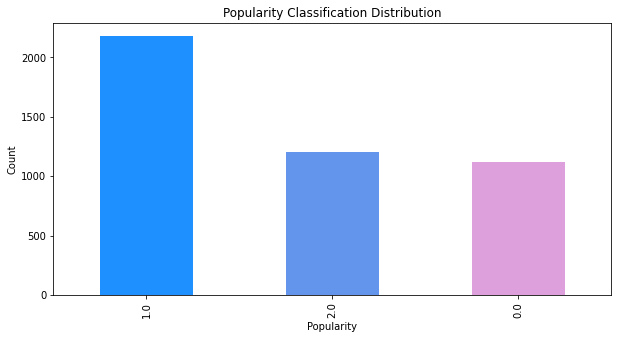

In [ ]:
# bar graph of popularity classifications vs count
ax = final_df['classification'].value_counts()
colors = ['dodgerblue', 'cornflowerblue', 'plum']
ax = ax.plot(kind='bar', figsize=(10,5), title='Popularity Classification Distribution', color=colors)
plt.xlabel('Popularity')
plt.ylabel('Count')

So, the majority of our data is **semi-popular**. Further examining this in more detail, we can look at the percentage divisions...

In [ ]:
popular_num = str(len(final_df[final_df['classification'] == 2]))
print('Total number of popular songs: ' + popular_num)

popular_percent = str(((len(final_df[final_df['classification'] == 2])) / len(final_df)) * 100)
print('Percentage of songs that are popular: ' + popular_percent + '%')

semi_num = str(len(final_df[final_df['classification'] == 1]))
print('Total number of semi-popular songs: ' + semi_num)

semi_percent = str(((len(final_df[final_df['classification'] == 1])) / len(final_df)) * 100)
print('Percentage of songs that are semi-popular: ' + semi_percent + '%')

unpop_num = str(len(final_df[final_df['classification'] == 0]))
print('Total number of unpopular songs: ' + unpop_num)

unpop_percent = str(((len(final_df[final_df['classification'] == 0])) / len(final_df)) * 100)
print('Percentage of songs that are not popular: ' + unpop_percent + '%')

Total number of popular songs: 1207
Percentage of songs that are popular: 26.79245283018868%
Total number of semi-popular songs: 2180
Percentage of songs that are semi-popular: 48.39067702552719%
Total number of unpopular songs: 1118
Percentage of songs that are not popular: 24.816870144284128%


We got around a **~25 / 25 / 50** split which is not too shabby and pretty reasonable considering the data we were given drew on three different charts, and not every song ends up being super popular 😏

Now, lets look at our features in more detail!

## Feature Analysis ☝️

To make our feature analysis simpler, we can encode the *string* values of **genre** and **artist**.

In [ ]:
# encode genre and artist
def create_frequency_dict(dataset, labels):
    scene_frequency_dict = {}
    label_map = {}
    curr_label = 0
    for i in labels:
      label_map[curr_label] = i
      curr_label += 1
scene_frequency_dict_genre = create_frequency_dict(final_df, final_df.Genre_new.unique())
scene_frequency_dict_artist = create_frequency_dict(final_df, final_df.Artist.unique())

# apply map of encodings to our final datafram
songs_encoded_df = final_df.copy()
songs_encoded_df['Genre_new'] = songs_encoded_df['Genre_new'].replace(scene_frequency_dict_genre)
songs_encoded_df['Artist'] = songs_encoded_df['Artist'].replace(scene_frequency_dict_artist)
songs_encoded_df

,Popularity,Title,Artist,Album/Single,Artist_followers,Explicit,Album,Release_date,danceability,energy,key,loudness,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Popu_max,Top10_dummy,Top50_dummy,classification
0,31833.95,adan y eva,Paulo Londra,single,11427104.0,0,Adan y Eva,2018-11-05,0.767,0.709,1,-4.470,0.3360,0.323000,0.000000,0.0676,0.720,171.993,258639,4,hip hop,740.0,1.0,10,1.0,1.0,2.0
1,418.00,it wont kill ya,"The Chainsmokers, Louane",album,16931568.0,0,Memories...Do Not Open,2017-04-07,0.572,0.530,6,-8.521,0.0654,0.064700,0.000169,0.1270,0.120,170.138,217613,4,pop,1314.0,1.0,72,0.0,0.0,0.0
2,56.00,hymn,Kesha,single,5910376.0,1,Hymn,2017-08-03,0.488,0.538,6,-4.974,0.0760,0.147000,0.000000,0.3050,0.380,67.037,205600,4,pop,1199.0,1.0,131,0.0,0.0,1.0
3,78.40,arrows,Foo Fighters,album,8092392.0,0,Concrete and Gold,2017-09-15,0.515,0.917,1,-7.312,0.0417,0.000209,0.000476,0.1450,0.409,121.988,266187,4,metal,1156.0,1.0,103,0.0,0.0,1.0
5,244.95,talking to myself,Linkin Park,album,17132813.0,0,One More Light,2017-05-19,0.593,0.712,2,-6.325,0.0286,0.001840,0.000000,0.1280,0.473,124.013,231307,4,metal,1272.0,1.0,86,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8103,228.75,feeling,Juice WRLD,album,13266070.0,1,Death Race For Love,2019-03-08,0.712,0.515,10,-6.004,0.0857,0.234000,0.000000,0.2050,0.563,160.000,201920,4,rap,617.0,1.0,90,0.0,0.0,1.0
8105,1896.00,lush life,Zara Larsson,album,7920553.0,0,So Good,2017-03-17,0.694,0.712,7,-3.923,0.0460,0.133000,0.000000,0.2110,0.799,98.022,201122,4,pop,1335.0,1.0,104,0.0,0.0,1.0
8106,141.60,the business,Tiësto,single,5177309.0,0,The Business,2020-09-16,0.798,0.620,8,-7.079,0.2320,0.414000,0.019200,0.1120,0.235,120.031,164000,4,house,59.0,1.0,160,0.0,0.0,1.0
8108,672.25,scooby doo pa pa,Dj Kass,single,30456.0,0,Scooby Doo Pa Pa,2017-09-12,0.910,0.754,10,-2.573,0.2390,0.039600,0.001540,0.1220,0.630,120.939,145972,4,dance/electronic,1159.0,1.0,88,0.0,0.0,1.0


### Correlation of Feature Variables 👯‍♂️

We have to tweak our dataframe a bit in order to examine the feature correlations...

To do this, we must track the release year of our dataset of songs. We will add a column to isolate the year.


In [ ]:
# converting to date time
songs_encoded_df['year'] = pd.to_datetime(songs_encoded_df['Release_date'])
# extracting just the year
songs_encoded_df['year'] = pd.DatetimeIndex(songs_encoded_df['Release_date']).year
songs_encoded_df.sample(10)

,Popularity,Title,Artist,Album/Single,Artist_followers,Explicit,Album,Release_date,danceability,energy,key,loudness,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Popu_max,Top10_dummy,Top50_dummy,classification,year
2158,364.00,eiskalt,"Loredana, Mozzik",single,961128.0,0,Eiskalt,2019-08-02,0.798,0.608,7,-6.001,0.1400,0.02740,0.000065,0.1060,0.677,180.014,151558,4,rap,470.0,1.0,143,0.0,0.0,1.0,2019
7164,113.05,star wars - prod. young miles - crookers x nic...,"MACHETE, Fabri Fibra, Massimo Pericolo",album,366905.0,1,MACHETE MIXTAPE 4,2019-07-05,0.789,0.767,0,-4.540,0.1190,0.14600,0.000000,0.0854,0.580,129.961,208622,4,hip hop,498.0,1.0,100,0.0,0.0,1.0,2019
5664,1220.95,focus,"Bazzi, 21 Savage",single,3807231.0,1,Focus (feat. 21 Savage),2019-06-13,0.752,0.703,1,-5.268,0.0969,0.00694,0.000000,0.1430,0.538,77.021,155134,4,pop,520.0,1.0,86,0.0,0.0,1.0,2019
7499,7279.20,ill be there,Jess Glynne,single,2340619.0,0,I'll Be There,2018-05-03,0.623,0.851,7,-3.111,0.0409,0.02280,0.000000,0.1200,0.400,100.063,193924,4,pop,926.0,1.0,54,0.0,0.0,0.0,2018
1976,157.50,calldrops,"A$AP Rocky, Kodak Black",album,8122580.0,1,TESTING,2018-05-25,0.514,0.403,5,-11.101,0.1280,0.89700,0.051000,0.1360,0.463,127.818,162373,4,hip hop,904.0,1.0,59,0.0,0.0,1.0,2018
4583,36.00,easier,5 Seconds of Summer,album,6734577.0,0,CALM,2020-03-27,0.576,0.460,5,-4.173,0.2460,0.47600,0.000000,0.1070,0.625,176.185,158099,4,boy band,232.0,1.0,156,0.0,0.0,2.0,2020
1524,24233.60,body like a back road,Sam Hunt,single,1970425.0,0,Body Like A Back Road,2017-02-01,0.732,0.458,5,-7.225,0.0311,0.44700,0.000000,0.1360,0.661,98.938,165387,4,country,1378.0,1.0,55,0.0,0.0,1.0,2017
6635,217.00,i could be the one - nicktim / radio edit,"Avicii, Nicky Romero",single,18439913.0,0,I Could Be The One [Avicii vs Nicky Romero],2012-01-01,0.509,0.790,6,-3.782,0.0374,0.33200,0.000067,0.3160,0.638,127.946,208316,4,house,3231.0,0.0,69,0.0,0.0,1.0,2012
149,1290.40,sex,"Cheat Codes, Kris Kross Amsterdam",single,1727948.0,1,Sex,2016-02-19,0.510,0.692,0,-5.825,0.1710,0.00451,0.000000,0.1380,0.209,102.420,228361,4,pop,1721.0,0.0,110,0.0,0.0,1.0,2016
564,44.80,harder than my demons,Big Sean,album,7838718.0,1,Detroit 2,2020-09-04,0.736,0.735,1,-6.200,0.1120,0.09070,0.000000,0.2090,0.398,107.029,131274,4,hip hop,71.0,1.0,145,0.0,0.0,0.0,2020


Next, we can drop the feature columns that are not super relevant for our analysis.

In [ ]:
eda_df = songs_encoded_df.drop(columns = {'Album/Single', 'Album',
                                          'Popu_max', 'Top10_dummy', 'Top50_dummy'})

And finally, we can gather the average values of various features for every year ...

In [ ]:
eda_df = eda_df.groupby('year')
avg_df = eda_df.mean().reset_index()
avg_df

,year,Popularity,Artist_followers,Explicit,danceability,energy,key,loudness,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Days_since_release,Released_after_2017,classification
0,1942,8805.250000,3.164020e+05,0.000000,0.317000,0.158000,9.000000,-16.485000,0.038100,0.673000,0.353000,0.338000,0.247000,130.503000,177480.000000,3.000000,28798.000000,0.000000,2.000000
1,1945,320.200000,3.164020e+05,0.000000,0.486500,0.218000,1.500000,-13.724500,0.071550,0.708000,0.000000,0.210000,0.598000,149.710500,170666.500000,4.000000,27702.000000,0.000000,0.500000
2,1957,2493.562500,3.572956e+06,0.000000,0.529750,0.242725,2.500000,-15.302000,0.039225,0.873750,0.004856,0.106050,0.606750,98.271250,132866.500000,4.250000,23020.000000,0.000000,0.750000
3,1959,1436.575000,1.046469e+06,0.000000,0.478500,0.358750,4.500000,-13.981000,0.052100,0.862750,0.000033,0.154175,0.766000,142.177750,139550.000000,3.750000,22589.000000,0.000000,0.750000
4,1960,109.675000,8.864725e+05,0.000000,0.657500,0.380000,4.500000,-11.927500,0.049650,0.722000,0.000000,0.166000,0.803500,133.998000,163367.000000,4.000000,22224.000000,0.000000,0.500000
5,1963,5895.650000,9.022337e+06,0.000000,0.361000,0.723500,4.500000,-8.816500,0.041050,0.703500,0.000004,0.079200,0.856500,163.130000,153580.000000,3.500000,20924.500000,0.000000,0.000000
6,1964,683.600000,2.848966e+06,0.000000,0.602000,0.553000,11.000000,-9.336000,0.032800,0.108000,0.000000,0.051200,0.971000,130.594000,118840.000000,4.000000,20450.000000,0.000000,2.000000
7,1965,6254.450000,4.729800e+04,0.000000,0.683000,0.375000,0.000000,-13.056000,0.030300,0.579000,0.000000,0.076000,0.888000,140.467000,135533.000000,4.000000,20397.000000,0.000000,2.000000
8,1967,468.250000,4.127309e+06,0.000000,0.573500,0.579000,8.000000,-10.455500,0.034850,0.363000,0.000000,0.131450,0.819500,148.761500,149447.000000,4.000000,19395.000000,0.000000,1.000000
9,1968,201.775000,2.387675e+06,0.000000,0.672500,0.478250,6.250000,-10.866250,0.038050,0.287750,0.000000,0.150375,0.660500,117.773000,173103.000000,3.750000,19209.000000,0.000000,1.250000


###Encode Categorical Variables using LabelEncoder 🙂

Converting some categorical features into hot vectors...

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# title
le_title = LabelEncoder()
# title mappings
le_title.fit(songs_encoded_df['Title'])

# artist
le_artist = LabelEncoder()
# artist mappings
le_artist.fit(songs_encoded_df['Artist'])

# genre
le_genre = LabelEncoder()
# genre mappings
le_genre.fit(songs_encoded_df['Genre_new'])


LabelEncoder()

We can now plot the correlation matrix to see if there are any relationships between certain feature variables ...

In [ ]:
songs_encoded_df['genre_labels'] = le_genre.transform(songs_encoded_df['Genre_new'])
songs_encoded_df['title_labels'] = le_title.transform(songs_encoded_df['Title'])
songs_encoded_df['artist_labels'] = le_artist.transform(songs_encoded_df['Artist'])

In [ ]:
# updated correlation heatmap based on feature variables
updated_songs_corr = songs_encoded_df.corr()

# correlation matrix
updated_songs_corr

,Popularity,Artist_followers,Explicit,danceability,energy,key,loudness,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Days_since_release,Released_after_2017,Popu_max,Top10_dummy,Top50_dummy,classification,year,genre_labels,title_labels,artist_labels
Popularity,1.000000,0.140290,-0.075599,0.073037,0.020213,0.014246,0.075141,-0.061058,0.007094,-0.030429,-0.033769,0.065265,-0.040540,0.018718,0.016769,-0.020256,-0.024467,-0.440696,0.532036,0.454217,0.313632,0.019903,0.084263,0.000235,-0.010542
Artist_followers,0.140290,1.000000,-0.074502,-0.054512,-0.079723,0.008572,-0.033596,-0.051508,0.065615,0.002140,0.004892,-0.046112,-0.040177,0.075573,-0.013578,-0.042251,-0.010910,-0.350228,0.241234,0.348243,0.291521,0.044258,0.096091,-0.003612,-0.167574
Explicit,-0.075599,-0.074502,1.000000,0.282299,-0.038418,-0.014061,-0.014400,0.407465,-0.121582,-0.076870,0.015709,-0.106345,0.083724,-0.032717,0.063843,-0.202314,0.226144,-0.008801,0.018167,0.008335,0.017871,0.201932,-0.145211,0.005593,-0.021128
danceability,0.073037,-0.054512,0.282299,1.000000,0.086531,0.019845,0.182506,0.192647,-0.249003,-0.117790,-0.090918,0.306070,-0.005735,-0.139629,0.184154,-0.182782,0.177657,-0.039576,0.023721,0.032798,0.042819,0.183438,-0.131563,-0.006029,-0.033202
energy,0.020213,-0.079723,-0.038418,0.086531,1.000000,-0.002016,0.734165,-0.006597,-0.511847,-0.063209,0.151288,0.378137,0.102383,0.049157,0.138431,-0.090900,0.013664,0.041245,-0.036390,-0.037718,-0.015280,0.090579,-0.076994,0.015237,-0.005433
key,0.014246,0.008572,-0.014061,0.019845,-0.002016,1.000000,-0.011654,0.021142,0.028932,0.000577,-0.016534,0.044819,-0.006395,0.005662,0.005248,0.004142,-0.013123,-0.007427,0.003713,-0.005984,-0.013807,-0.003523,0.018904,0.010654,0.000094
loudness,0.075141,-0.033596,-0.014400,0.182506,0.734165,-0.011654,1.000000,-0.070497,-0.447021,-0.162731,0.059659,0.295527,0.088700,0.035383,0.131169,-0.232638,0.107710,-0.006428,0.007293,0.005834,0.029686,0.231992,-0.062437,0.025230,-0.034424
speechiness,-0.061058,-0.051508,0.407465,0.192647,-0.006597,0.021142,-0.070497,1.000000,-0.054108,-0.075725,0.067707,0.035617,0.134872,-0.067814,0.078637,-0.146262,0.163808,0.017105,0.004959,-0.019381,-0.017468,0.146067,-0.153743,-0.022297,-0.069849
acoustics,0.007094,0.065615,-0.121582,-0.249003,-0.511847,0.028932,-0.447021,-0.054108,1.000000,0.062250,-0.049656,-0.090327,-0.093528,-0.034904,-0.144085,0.133505,-0.058071,-0.011333,0.018437,0.022912,-0.014548,-0.133209,0.073300,-0.024752,-0.017868
instrumentalness,-0.030429,0.002140,-0.076870,-0.117790,-0.063209,0.000577,-0.162731,-0.075725,0.062250,1.000000,-0.004347,-0.087737,-0.012501,0.085970,-0.124573,0.002408,-0.003648,-0.000214,0.001688,-0.009296,-0.008527,-0.002937,0.006716,-0.006584,-0.016962


And the heatmap...

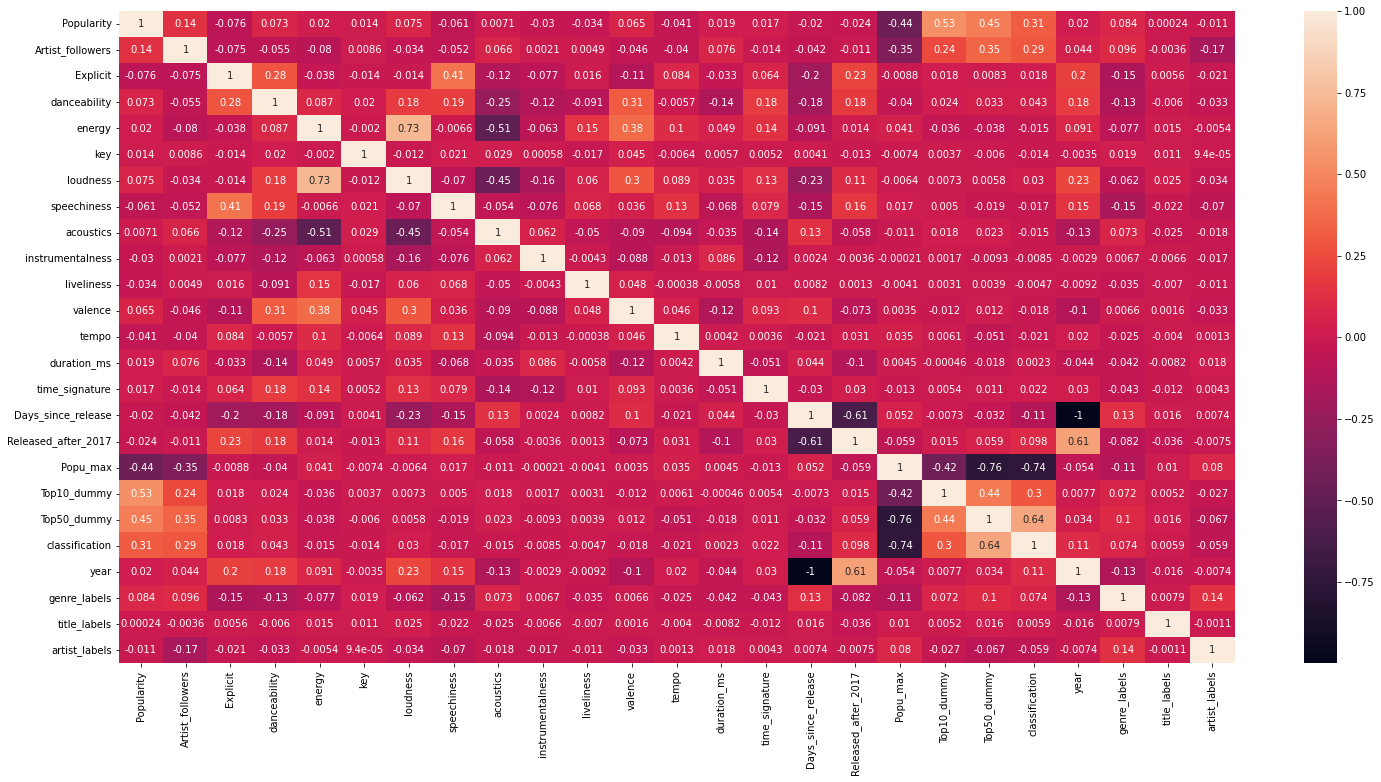

In [ ]:
# heatmap for easier visualization
plt.figure(figsize = (25, 12))
songs_heatmap = sns.heatmap(updated_songs_corr, annot=True)

We have a high correlation between `days_since_release` and `year`, `days_since_release` and `Released_after_2017` and `Popu_max` and `classification`. These correlations are all pretty intuitive, so for some more significant analysis, we can narrow down the features a bit more...

In [ ]:
new_corr = updated_songs_corr.drop(columns = {'Popularity', 'Top10_dummy', 'Top50_dummy',
                                              'Days_since_release', 'Released_after_2017'})
new_corr = new_corr.drop({'Popularity', 'Top10_dummy', 'Top50_dummy',
                          'Days_since_release', 'Released_after_2017'})
new_corr

,Artist_followers,Explicit,danceability,energy,key,loudness,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Popu_max,classification,year,genre_labels,title_labels,artist_labels
Artist_followers,1.000000,-0.074502,-0.054512,-0.079723,0.008572,-0.033596,-0.051508,0.065615,0.002140,0.004892,-0.046112,-0.040177,0.075573,-0.013578,-0.350228,0.291521,0.044258,0.096091,-0.003612,-0.167574
Explicit,-0.074502,1.000000,0.282299,-0.038418,-0.014061,-0.014400,0.407465,-0.121582,-0.076870,0.015709,-0.106345,0.083724,-0.032717,0.063843,-0.008801,0.017871,0.201932,-0.145211,0.005593,-0.021128
danceability,-0.054512,0.282299,1.000000,0.086531,0.019845,0.182506,0.192647,-0.249003,-0.117790,-0.090918,0.306070,-0.005735,-0.139629,0.184154,-0.039576,0.042819,0.183438,-0.131563,-0.006029,-0.033202
energy,-0.079723,-0.038418,0.086531,1.000000,-0.002016,0.734165,-0.006597,-0.511847,-0.063209,0.151288,0.378137,0.102383,0.049157,0.138431,0.041245,-0.015280,0.090579,-0.076994,0.015237,-0.005433
key,0.008572,-0.014061,0.019845,-0.002016,1.000000,-0.011654,0.021142,0.028932,0.000577,-0.016534,0.044819,-0.006395,0.005662,0.005248,-0.007427,-0.013807,-0.003523,0.018904,0.010654,0.000094
loudness,-0.033596,-0.014400,0.182506,0.734165,-0.011654,1.000000,-0.070497,-0.447021,-0.162731,0.059659,0.295527,0.088700,0.035383,0.131169,-0.006428,0.029686,0.231992,-0.062437,0.025230,-0.034424
speechiness,-0.051508,0.407465,0.192647,-0.006597,0.021142,-0.070497,1.000000,-0.054108,-0.075725,0.067707,0.035617,0.134872,-0.067814,0.078637,0.017105,-0.017468,0.146067,-0.153743,-0.022297,-0.069849
acoustics,0.065615,-0.121582,-0.249003,-0.511847,0.028932,-0.447021,-0.054108,1.000000,0.062250,-0.049656,-0.090327,-0.093528,-0.034904,-0.144085,-0.011333,-0.014548,-0.133209,0.073300,-0.024752,-0.017868
instrumentalness,0.002140,-0.076870,-0.117790,-0.063209,0.000577,-0.162731,-0.075725,0.062250,1.000000,-0.004347,-0.087737,-0.012501,0.085970,-0.124573,-0.000214,-0.008527,-0.002937,0.006716,-0.006584,-0.016962
liveliness,0.004892,0.015709,-0.090918,0.151288,-0.016534,0.059659,0.067707,-0.049656,-0.004347,1.000000,0.047708,-0.000378,-0.005796,0.010272,-0.004077,-0.004678,-0.009234,-0.035171,-0.006951,-0.010658


For the updated heatmap...

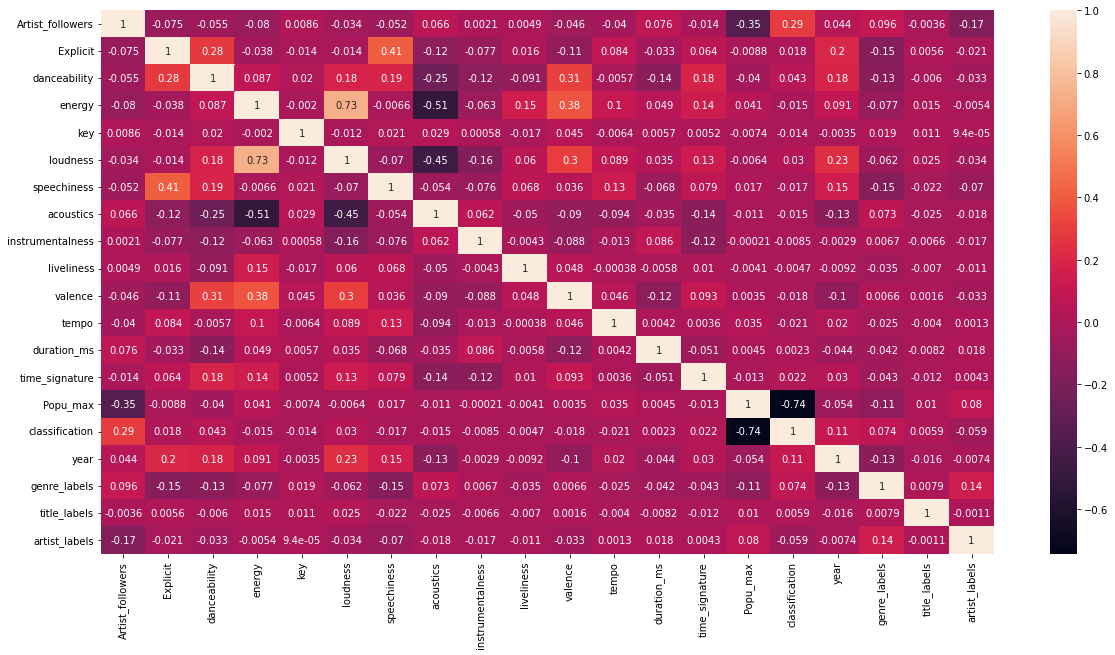

In [ ]:
plt.figure(figsize = (20, 10))
new_heatmap = sns.heatmap(new_corr, annot=True)

We see that **max popularity** and **artist follwers** have a pretty high correlation. This tracks as popular artits understandly have a built in fanbase for their music! For more of the techical features of music, **acoustics** has a high correlation with **energy** and **loudness**, but **energy** and **loudness** have low correlations with each other which is interesting...

## Feature Trends 🧎‍♂️

For further analysis on song features, we can examine the trends of these features through the years!

We will make some line graphs with an added line of best fit to easily visualize the trend directions.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/pyth

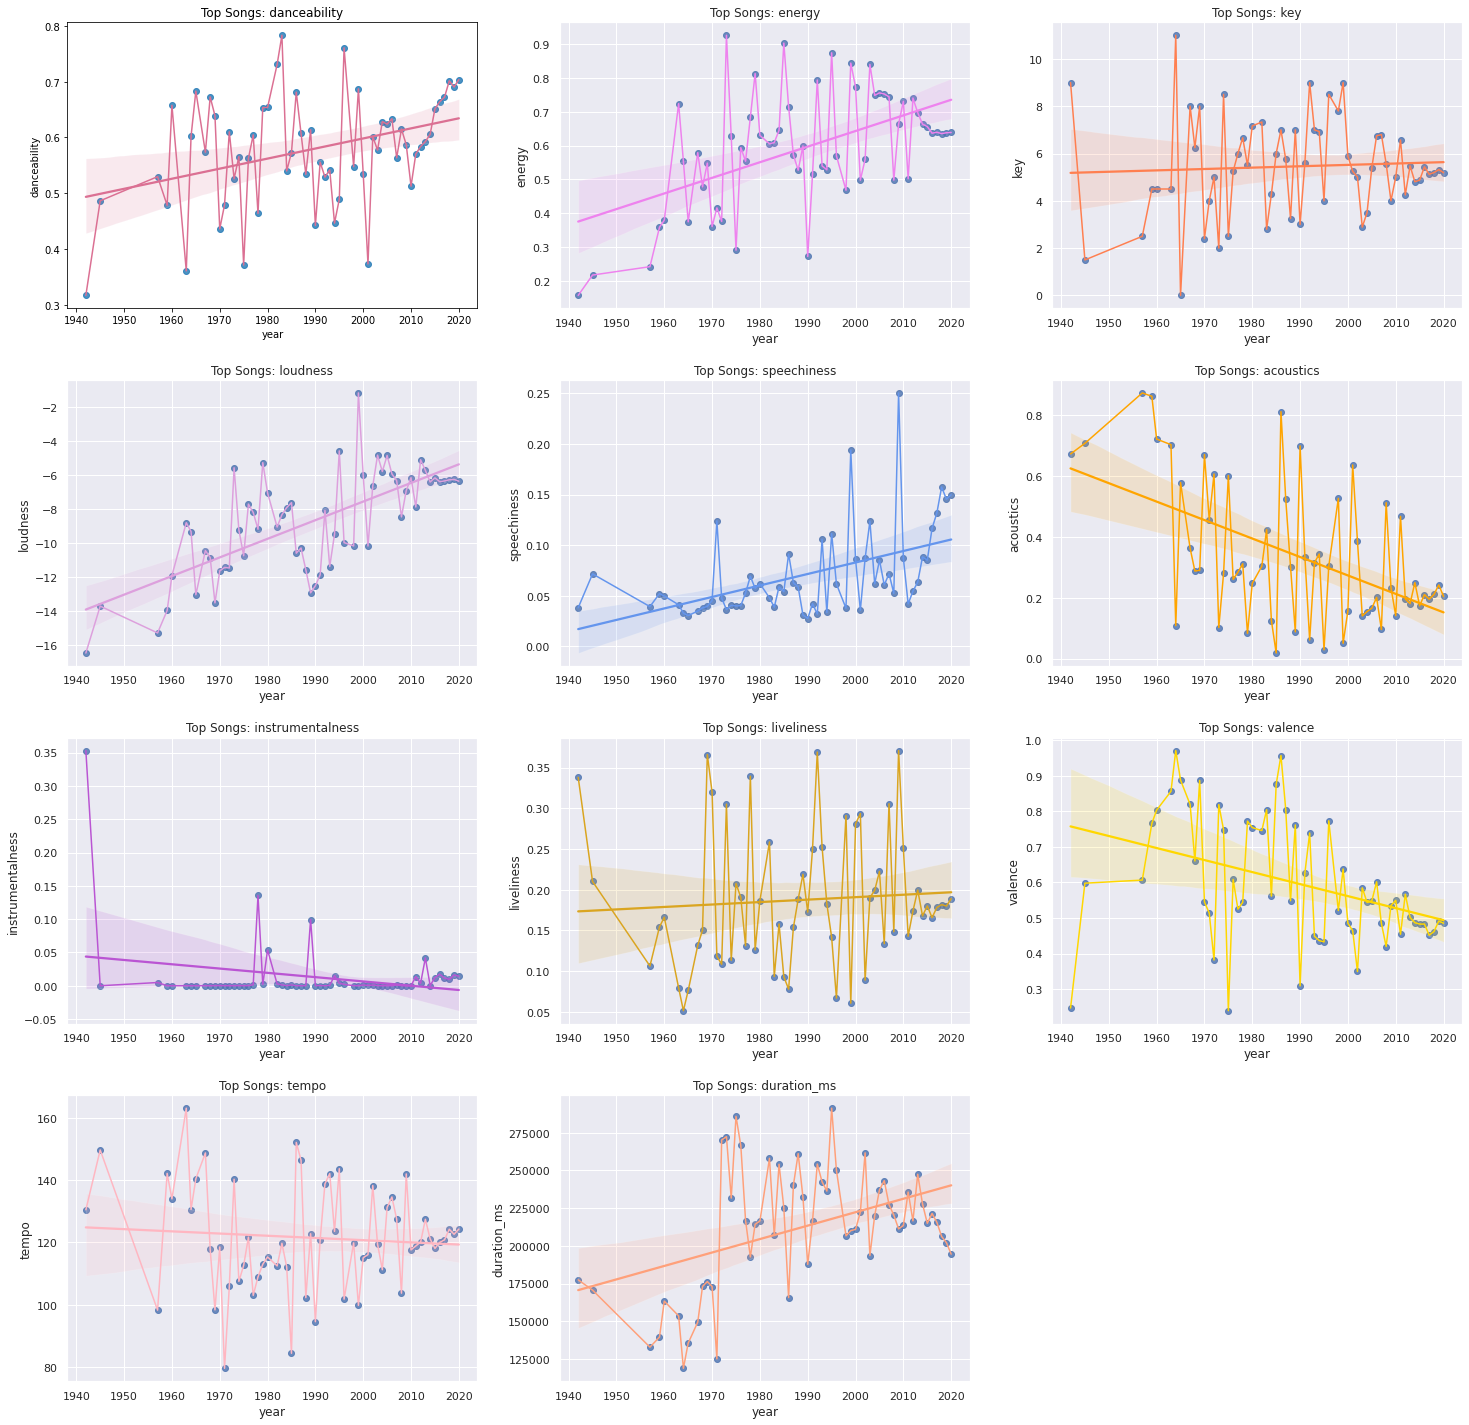

In [ ]:
# size of our graphs
fig = plt.figure()
fig.set_size_inches(25, 25)
fig.subplots_adjust(hspace=0.25)

# features of interest
features = ['danceability', 'energy', 'key', 'loudness', 'speechiness','acoustics',
            'instrumentalness', 'liveliness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# fun colours!
colors = ['palevioletred', 'violet', 'coral', 'plum', 'cornflowerblue',
          'orange', 'mediumorchid', 'goldenrod', 'gold', 'lightpink', 'lightsalmon']

# traversing through the song features
f_dict = {i : features[i] for i in range (0, 12)}

for i in range(11):
  ax = 'ax%s'
  ax = ax % (i + 1)
  feature = f_dict.get(i)

  ax = fig.add_subplot(4, 3, i + 1)

  # line of best fit
  sns.set(color_codes=True)
  ax = sns.regplot('year', feature, avg_df, line_kws={'color':colors[i]})

  # plot line graph
  ax.plot(avg_df['year'], avg_df[feature], colors[i])

  # graph title
  ax.set_title('Top Songs: ' + feature)
  
  # labeling axis
  ax.set_xlabel('year')
  ax.set_ylabel(feature)

From these graphs, it looks like for top songs, song **duration**, **loudness**, **speechiness**, **energy**, and **dancebility** have seen an *upward* trend through the years. Meanwhile, **mode** and **valence** have seen a *downwards* trend. Something to think about I suppose 🤨

Now, instead of examining feature trends though the years, lets see the feature trends across popularity classifications! We will do this through a scatter graph this time...

In [ ]:
import numpy as np

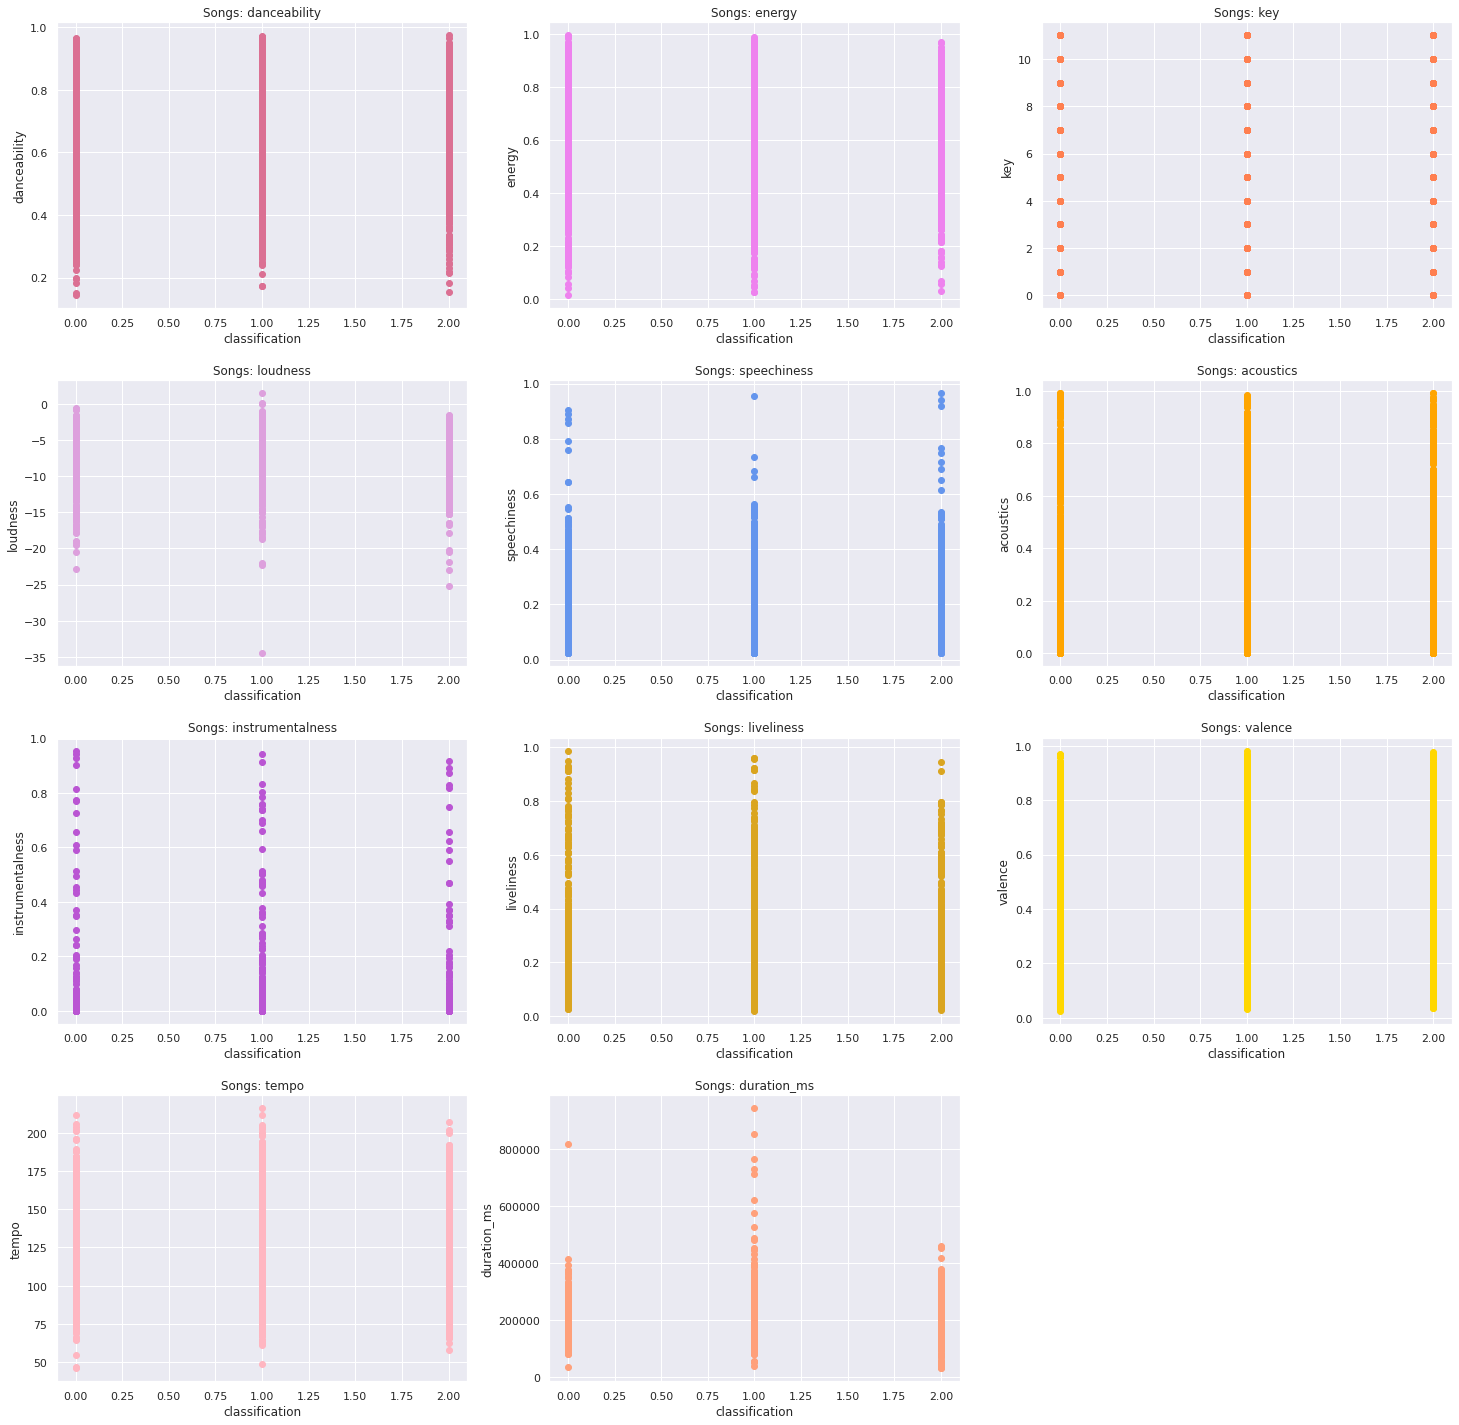

In [ ]:
fig = plt.figure()
fig.set_size_inches(25, 25)
fig.subplots_adjust(hspace=0.25)

features = ['danceability', 'energy', 'key', 'loudness', 'speechiness','acoustics',
            'instrumentalness', 'liveliness', 'valence', 'tempo', 'duration_ms', 'time_signature']

colors = ['palevioletred', 'violet', 'coral', 'plum', 'cornflowerblue',
          'orange', 'mediumorchid', 'goldenrod', 'gold', 'lightpink', 'lightsalmon']

# traversing through the song features
f_dict = {i : features[i] for i in range (0, 12)}

for i in range(11):
  ax = 'ax%s'
  ax = ax % (i + 1)
  feature = f_dict.get(i)

  ax = fig.add_subplot(4, 3, i + 1)

  # plot scatter graph
  x = np.array(songs_encoded_df['classification'])
  y = np.array(songs_encoded_df[feature])
  plt.scatter(x, y, color=colors[i])

  # graph title
  ax.set_title('Songs: ' + feature)

  # labeling axis
  plt.xlabel('classification')
  plt.ylabel(feature)

Looks like the values of features : **valence**, **acoustics**, and **energy**, for the most part, did not affect popularity classification. 


**Next up is some machine learning! My soul has evaporated so here is some motivation 😔**

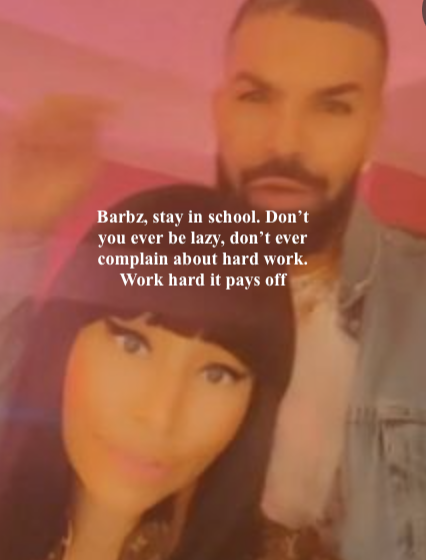

#**Part VI: Modeling the Data** 🥸

Now it's time to train some machine learning models using sklearn!

## Linear Regression 🤥

In [ ]:
from sklearn.linear_model import LinearRegression

To split data into train and test set, we will use sklearn's train_test_split library. The split will be 80% for training and 20%  for testing. 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# we first randomize the data order
rand_df = final_df.sample(frac=1.0)
rand_df = rand_df.reset_index(drop=True)

# dropping the non-numeric columns
X = songs_encoded_df.copy()
X = X.drop(columns=['Title', 'Artist', 'Album/Single',
                    'Album', 'Release_date', 'Genre_new',
                    'Popularity', 'classification'])
Y = songs_encoded_df['classification'].astype(int)

# train + test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

Now, the **linear regression** part!

In [ ]:
linear = LinearRegression()
linear.fit(x_train, y_train)

y_pred = linear.predict(x_test)
linear_acc = linear.score(x_test, y_test)

# printing the accuracy
print('Accuracy score: ' + str(linear_acc))

Accuracy score: 0.5938830182861775


The accuracy score is **~0.597** which is alright. Linear Regression won't necessarily account for the variations between our three popularity classifications, so to try to improve accuracy, we can try...

## Ridge Regression 🏔

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
model = make_pipeline(StandardScaler(with_mean=False), Ridge())
model.fit(x_train, y_train)

ridge_acc = model.score(x_test, y_test)

# printing the accuracy
print('Accuracy score: ' + str(ridge_acc))

Accuracy score: 0.593902078071276


The accuracy score is also around **~0.597** (in fact, it is *very* slightly worse). So, perhaps we can see if doing **Grid Search Validation** with it it will improve our accuracy 🤞

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {'alpha': [0.0001, 0.001, 0.002, 0.003, 0.005, 0.01]}

grid_search = GridSearchCV(Ridge(), param)
grid_search.fit(x_train, y_train)

print('Best Alpha Value: ' + str(grid_search.best_params_))

ridge_acc_gs = grid_search.best_score_
print('Best Accuracy Score: ' + str(ridge_acc_gs))

Best Alpha Value: {'alpha': 0.01}
Best Accuracy Score: 0.563775127313997


We see that the best alpha value is **0.01** and the best accuracy score is **~0.562**. So it has improved slightly but yeah...it's still not super accurate. Another modeling approach that hopefully 🙏 will work better is...

##  Classification 💅

Besides just hoping and praying classification will lead to a higher accuracy score, we have some inution that this may work better, as we know that our three popularity rankings should have some variations between specific features. 

Classification will be used to test accuracies using a **Naive Bayes Classifier** model, a **Decision Tree Classifier model**, and a **Random Forest Classifier** model. 

## Naive Bayes Classifier 😸

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# model 
clf = GaussianNB()
y_pred = clf.fit(x_train, y_train).predict(x_test)

In [ ]:
# accuracy
naive_bayes_acc = clf.score(x_test, y_test)
print(naive_bayes_acc)

0.5382907880133185


Uh, so we see how the **Naive Bayes Classifier** in fact has a slightly worse accuracy score of **~0.527**

## Dimensionality Reduction with PCA 💪
Using **PCA**, we can reduce the number of dimensions of the dataset. This hopefully will get our accuracy up!

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Text(0, 0.5, 'explained_variance_ratio')

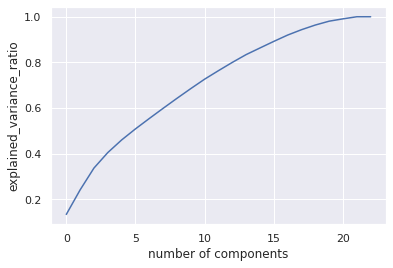

In [ ]:
# scaling
# find num components to use
scaler = StandardScaler()
pca = PCA()

train_fit = scaler.fit(x_train)
train_fit_trans = scaler.fit_transform(x_train)

pca.fit_transform(train_fit_trans)

# plot for explained variance
variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(variance))

# labels
plt.xlabel('number of components')
plt.ylabel('explained_variance_ratio')

We then use this plot to decide the number of components to keep. Then we can fit and transform our PCA on the training set!

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca_components = pca.components_

[1.34389734e-01 1.07500527e-01 9.55927774e-02 6.77528867e-02
 5.52182924e-02 4.84516581e-02 4.55397816e-02 4.45842671e-02
 4.37632740e-02 4.26213629e-02 4.12846327e-02 3.72472779e-02
 3.61430675e-02 3.41765541e-02 2.90429973e-02 2.87724312e-02
 2.76958436e-02 2.34684448e-02 2.04665423e-02 1.68600149e-02
 1.02165766e-02 9.17729566e-03 3.37603858e-05]


In [ ]:
pca = PCA(n_components=15)

x_train = pca.fit_transform(train_fit_trans)
x_test = pca.transform(scaler.transform(x_test))

NOW 🥵 we will move onto the **trees**! And hopefully we will see some improvements in accuracy ...

##Decision Tree Classifier 🌳

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dtree = DecisionTreeClassifier(max_depth=25)
dtree.fit(x_train, y_train)

predict_dt = dtree.predict(x_test)
dtree_acc = accuracy_score(predict_dt, y_test)

# printing accuracy score
print('Accuracy Score: ' + str(dtree_acc))

Accuracy Score: 0.6759156492785794


Getting better! Our **Decision Tree Classifier** has an improved accuracy score of **~0.700**. But we are overachievers! So let's try to further improve this score though **grid search** *parameter tuning* ...

In [ ]:
# parameter tuning
depth = [1, 2, 4, 6, 8, 10, 12, 15]
sample = [1, 2, 3, 4, 5, 6, 7, 8]

dt_cv = GridSearchCV(DecisionTreeClassifier(), {'max_depth': depth, 'min_samples_leaf': sample})

dt_cv.fit(X, Y)
dt_acc = dt_cv.best_score_

print('Best Alpha Value: ' + str(dt_cv.best_params_))
print('Accuracy Score: ' + str(dt_acc))

Best Alpha Value: {'max_depth': 2, 'min_samples_leaf': 1}
Accuracy Score: 0.8521642619311877


Yooooo hypertuning the parameters improved our accuracy by A LOT! We are now at a **~0.852** accuracy. Ngl, we are getting high from these improvements...let us go a step further to see if it can get any better!

##Random Forest Classifier 🏕

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(x_train, y_train)

pred_rf = rf.predict(x_test)
rf_acc = accuracy_score(pred_rf, y_test)

# print accuracy score
print('Accuracy Score: ' + str(rf_acc))

Accuracy Score: 0.779134295227525


We got an accuracy of **~0.779** which is not as good as our last classifier... for further improvements, we will be using **grid search** to train a **random forest** model!

In [ ]:
# parameter tuning
depth = [5, 10, 20, 30, 60, 70]
estimator = [80, 100, 200, 300, 400, 500, 600]

param= {'max_depth': depth, 'n_estimators': estimator}

# grid search on random forest
rf_cv = GridSearchCV(RandomForestClassifier(), param_grid=param)
rf_cv.fit(x_train, y_train)

prediction = rf_cv.predict(x_test)
rf_acc = accuracy_score(prediction, y_test)

print('Best Alpha Value: ' + str(rf_cv.best_params_))
print('Accuracy Score: ' + str(rf_acc))

In [ ]:
rf_new = RandomForestClassifier(n_estimators=400, max_depth=20)
rf_new.fit(x_train, y_train)

pred_rf_new = rf_new.predict(x_test)
rf_acc_new = accuracy_score(pred_rf_new, y_test)

# print accuracy score
print('Accuracy Score: ' + str(rf_acc_new))

Accuracy Score: 0.7846836847946725


So, our grid search parameters didn't improve our accuracy score that much (**~0.785**), but tbh,,, we're cool with that 😎

## SO... Which Features Were Best?! 😍

We can try to find the best features through a **random forest regressor**!

i copied this straight from google so need to edit

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# making the model
model = RandomForestRegressor()
model.fit(x_train, y_train)

print('model score on training data: ' + str(model.score(x_train, y_train)))
print('model score on testing data: ' + str(model.score(x_test, y_test)))

model score on training data: 0.932740572970261
model score on testing data: 0.5634411006522206


A we see, the training data has a much higher score than our testing data. This means that our model is overfitting...

In [ ]:
X = songs_encoded_df.drop(columns=['classification', 'Title'])
Y = songs_encoded_df['classification'].astype(int)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

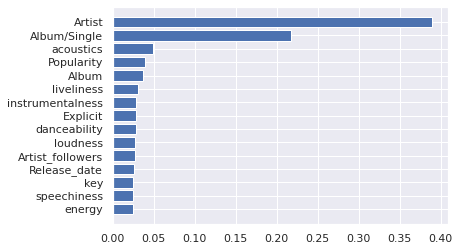

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

It looks like **how famous an artist** is has the greatest impact...for example: if Taylor Swift releases a song its more likely to be popular than some sound cloud rapper's song 🙄

Whether the music is an **album or single** also has some weight...this makes sense as usually singles are promoted more so they perform better. Most causal listeners will not purchase full albums 😗

## FINALLY ... Which Model is the Best?! 🌚

As seen in our previous steps, we had various different accuracy scores over the different models. To visualize these scores, we can make a lil bar graph to show which model was best for our analysis 😻

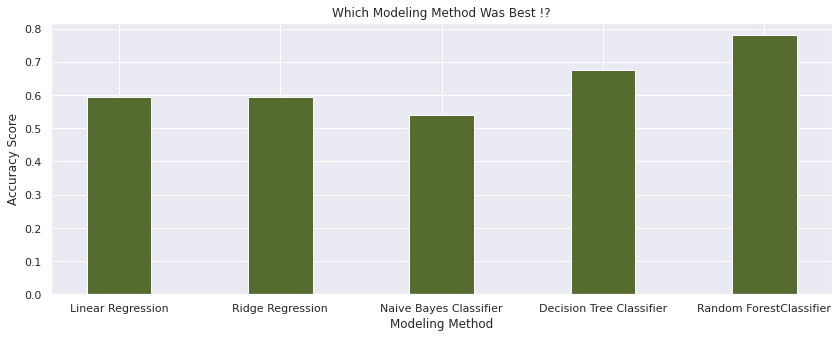

In [ ]:
# bar graph of modeling methods and their accuracies
data = {'Linear Regression':round(linear_acc, 5),
        'Ridge Regression':round(ridge_acc, 5),
        'Naive Bayes Classifier':round(naive_bayes_acc, 5),
        'Decision Tree Classifier':round(dtree_acc, 5),
        'Random ForestClassifier':round(rf_acc, 5)}

model_method = list(data.keys())
acc = list(data.values())
  
fig = plt.figure(figsize = (14, 5))
 
# creating the bar plot
plt.bar(model_method, acc, color ='darkolivegreen', width = 0.4)
 
# labels
plt.xlabel("Modeling Method")
plt.ylabel("Accuracy Score")
plt.title("Which Modeling Method Was Best !?")
plt.show()

# **Conclusions 🥵**

## Potential Next Steps/ Future Direction 🤯




*   One issue we faced was that we didn't have too much data after all our cleaning. We were restricted to only the global charts when we were webscraping. To absolve this issue, we met with Sally 🥰 and she pointed us in the direction of instead creating a simplier classification predictor!

*   In the future, we would like to have more popularity classifications. We also would want to use more features other than peak chart position to measure popularity. Here rose another challenge: our Spotify data was skewed and our duration wouldn't have been. Thus, we were prevented from a more nuianced measuring of popularity 👹

*   We would have also liked to calculate a popularity score for our complete merged data set! Our original data included a popularity score, and in the future it would be interesting to recreate this calculation to help predict ultimate popularity 😌

*   We could also try deep learning so we can tune our models even better!

*   It would also be interesting to perhaps create a popular song recommendation generator. We could also use our machine learning models and some time series analysis to predict features of popular songs in the future!

# Description of Challenges/ Obstacles Faced 😨
We have noted them throughout (and under our future plans section) 😮‍💨

# **🤎 THE END 🤎**

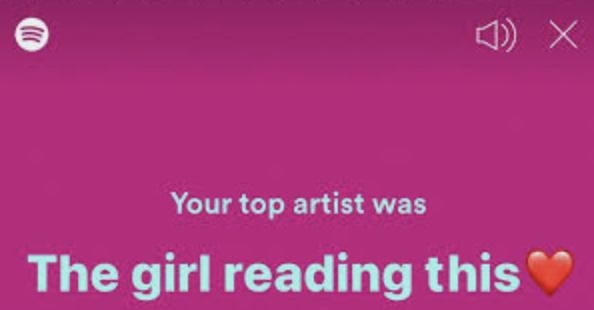